# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [308]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [309]:
hotel = pd.read_csv("INNHotelsGroup.csv")
hotel.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

<IPython.core.display.Javascript object>

In [310]:
hotel.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [311]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [312]:
hotel.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  
count             36275.00000  
mean                  0.61966  
std                   0.78624  
min                   0.00000  
25%                   0.00000  
50%                   0.00000  
75%                   1.00000  
max                   5.00000

<IPython.core.display.Javascript object>

#### Observations:

1. There are 36275 rows and 19 columns in the data.
2. All the columns data type are same as expected.

In [313]:
# Changing the object type to category type

list_str_obj_cols = hotel.columns[hotel.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    hotel[str_obj_col] = hotel[str_obj_col].astype("category")

hotel.dtypes

Booking_ID                              category
no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                       category
required_car_parking_space                 int64
room_type_reserved                      category
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                     category
repeated_guest                             int64
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                          category
dtype: object

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Histogram for numerical columns

In [314]:
def create_histogram_boxplot(data, column_name, kde=False, figsize=(10, 5)):
    # create plots sidebyside nrows=1 and ncols=2
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    sns.boxplot(data=data, ax=ax_box2, x=column_name)
    sns.histplot(data=data, ax=ax_hist2, x=column_name, kde=kde)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

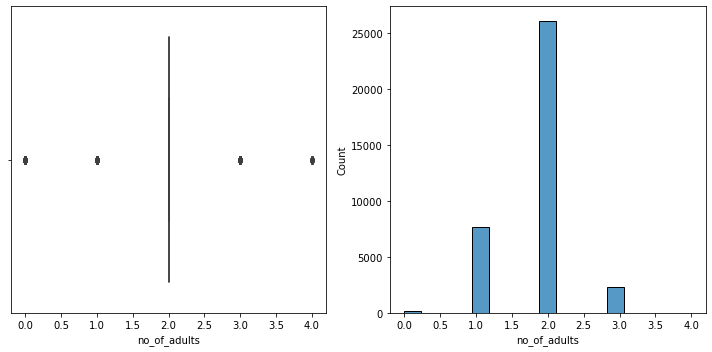

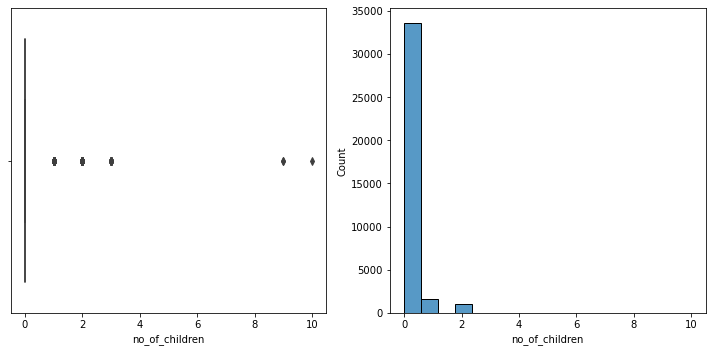

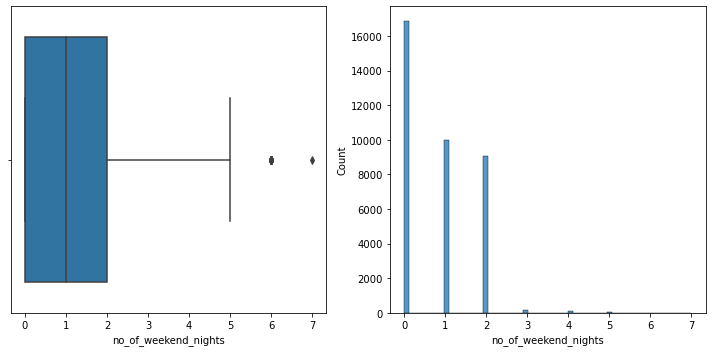

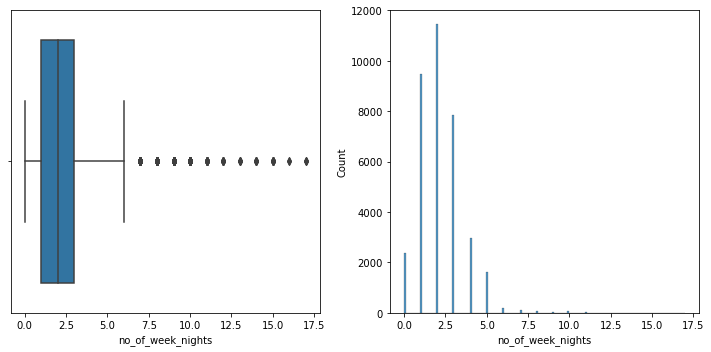

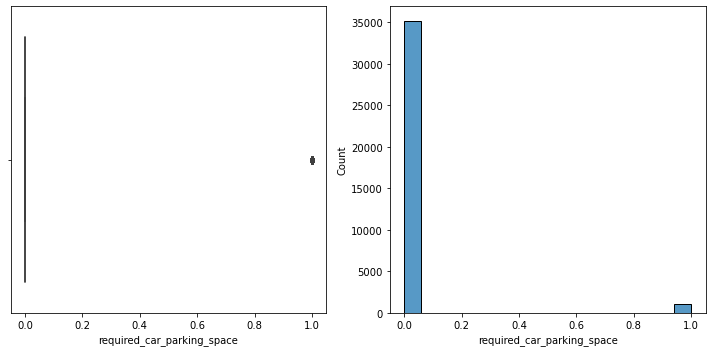

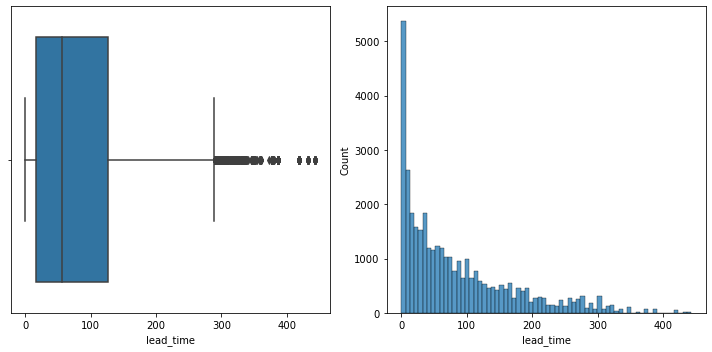

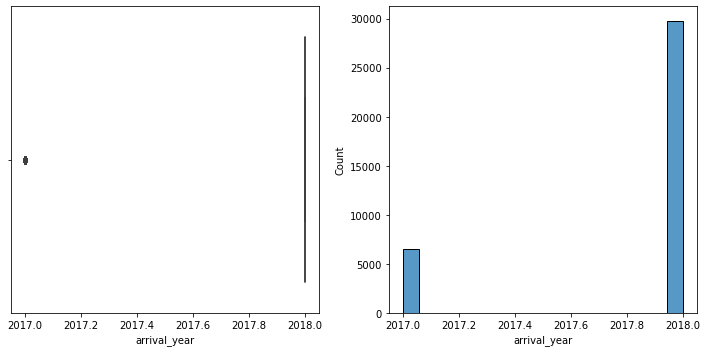

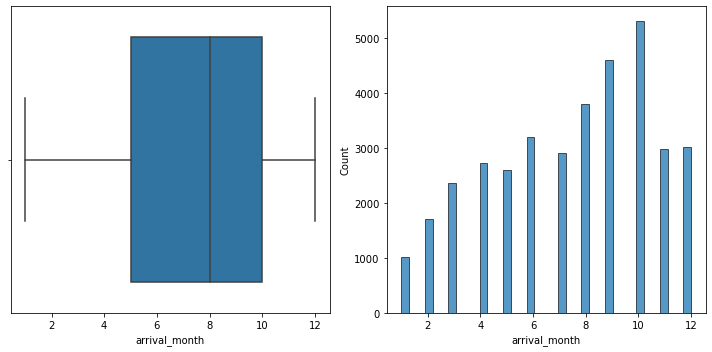

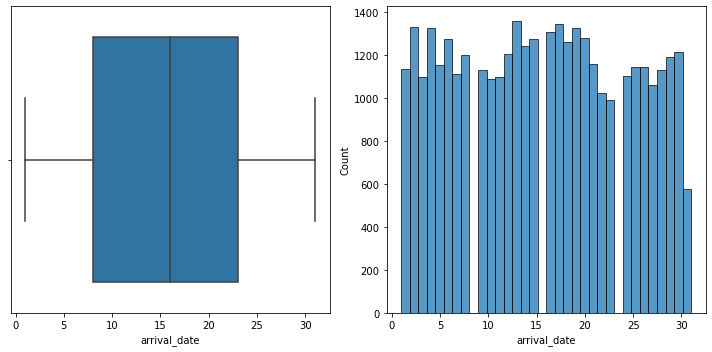

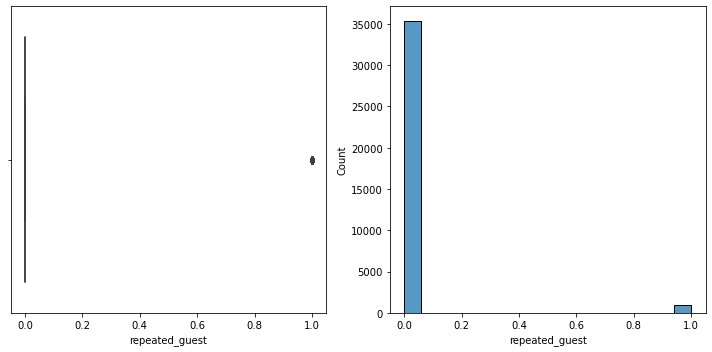

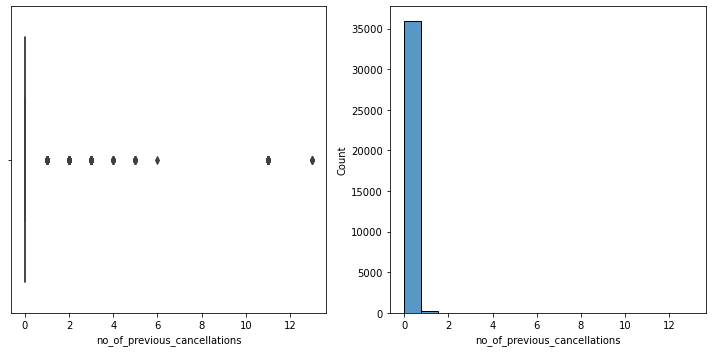

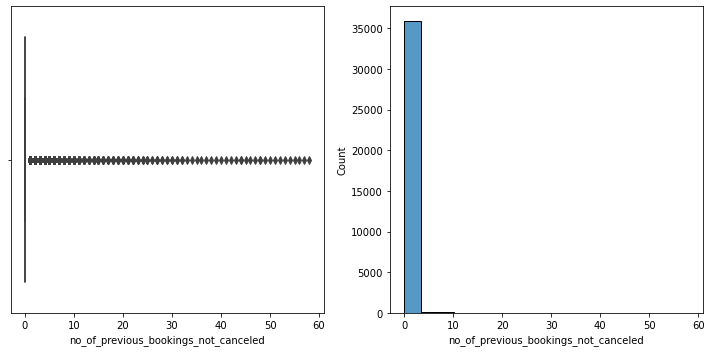

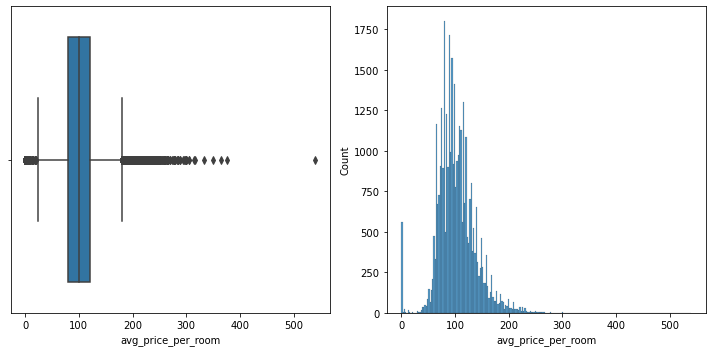

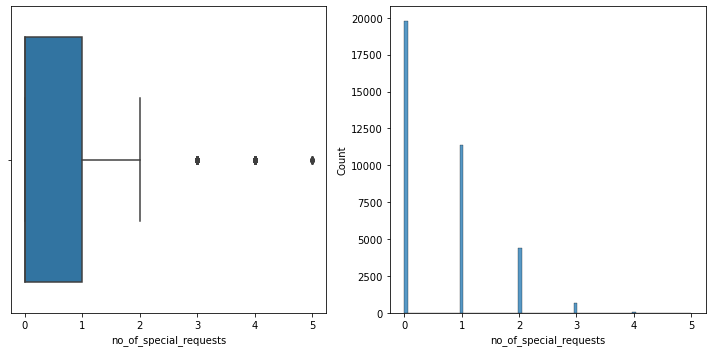

<IPython.core.display.Javascript object>

In [315]:
list_non_category_cols = hotel.columns[hotel.dtypes != "category"].tolist()
for i in list_non_category_cols:
    create_histogram_boxplot(hotel, i)

#### Observations:

1. no_of_adults varies from 0 to 4. Most of the bookings are for 2 adults.
2. no_of_children varies from 0 to 10 with maximum bookings with 0 children.
3. no_of_weekend_nights bookings varies from 0 to 7 in the decreasing order from 0 to 7. 75% of bookings are between 0 to 2 days on weekends
4. no_of_week_nights bookings from 0 to 17.5 in decreasing order from 1 to 17.5. 75% of bookings are < 3 nights
5. required_car_parking_space is 0 or 1. 75% of bookings doesn't require car parking space. Assuming people booking hotels travel either by train, bus or airplane and doesn't use their own cars.
6. lead_time has a right skewed distibution. 75% of the bookings are less than 126 days
7. arrival_year is 2017 and 2018. 2018 booking are more than 2017 bookings comparitively.
8. arrival_month september and October has more number of bookings
9. arrival_dates have uniform distribution. 50% of data is between 8 to 23 dates
10. repeated_guest are less compared to non repeated guests
11. avg_price_per_room has a normal distribution.50% of price is 80 to 120 Euros per day.
12. no_of_special_requests are 0 in most of the cases and maximum request is 1.

### Count plot for category attributes

In [316]:
def create_count_boxplot(data, column_name, figSize=(10, 5)):
    sns.countplot(data=data, x=column_name)
    plt.xticks(rotation=90)
    plt.figure(figsize=figSize)
    plt.show()

<IPython.core.display.Javascript object>

In [317]:
list_category_cols = hotel.columns[hotel.dtypes == "category"].tolist()
list_category_cols.remove("Booking_ID")
print(list_category_cols)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


<IPython.core.display.Javascript object>

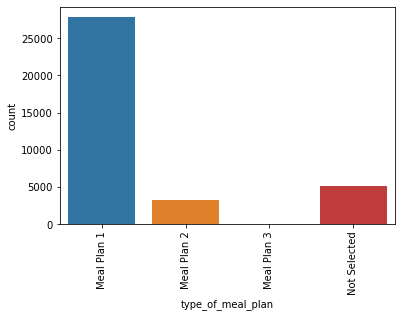

<Figure size 2160x360 with 0 Axes>

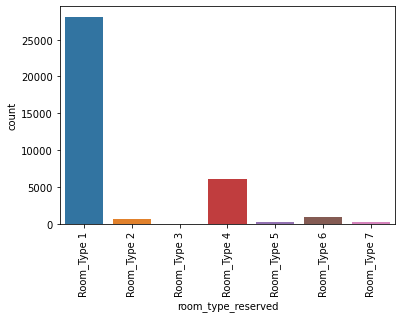

<Figure size 2160x360 with 0 Axes>

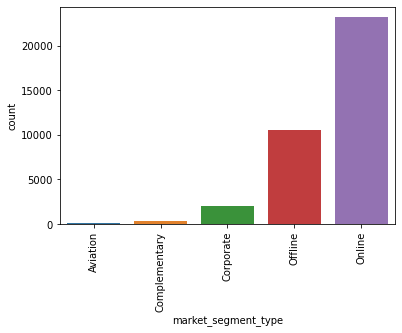

<Figure size 2160x360 with 0 Axes>

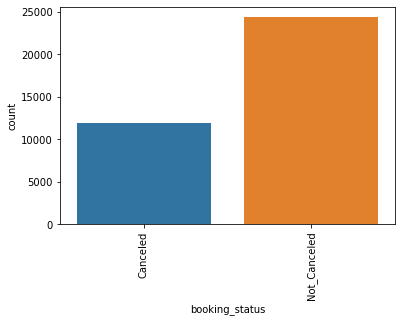

<Figure size 2160x360 with 0 Axes>

<IPython.core.display.Javascript object>

In [318]:
for i in list_category_cols:
    create_count_boxplot(hotel, i, (30, 5))

#### Observations:

1. Not_Cancelled bookings are more than cancelled bookings
2. market_segment_type of typer Online has highest number of booking count > 25000. Least preferred type of market_segment_type is Aviation and Complementary
3. room_type of type room_type1 has highest number of booking count > 25000. Least preferred type are 3, 5 and 7
4. Meal Plan 1 has highest preference and Meal plan 3 has least preference

#### Observations on average price per room

In [319]:
hotel[hotel["avg_price_per_room"] == 0]
hotel.loc[hotel["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Aviation           0
Corporate          0
Offline            0
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [320]:
# Calculating the 25th quantile
Q1 = hotel["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = np.percentile(
    hotel["avg_price_per_room"], 75
)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [321]:
# assigning the outliers the value of upper whisker
hotel.loc[hotel["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

In [322]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on number of adults

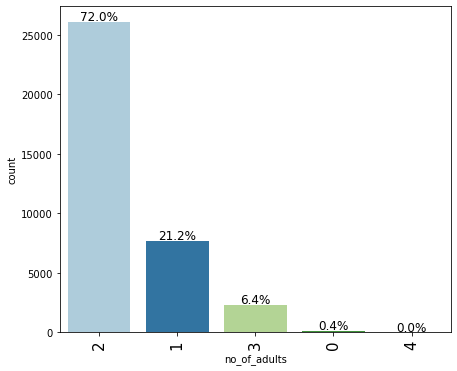

<IPython.core.display.Javascript object>

In [323]:
labeled_barplot(hotel, "no_of_adults", perc=True)

- 72% of bookings have 2 adults in their booking. 
- 0 and > 3 adults are relatively 0 records

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [324]:
hotel["booking_status"] = hotel["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

### Bivariate Analysis

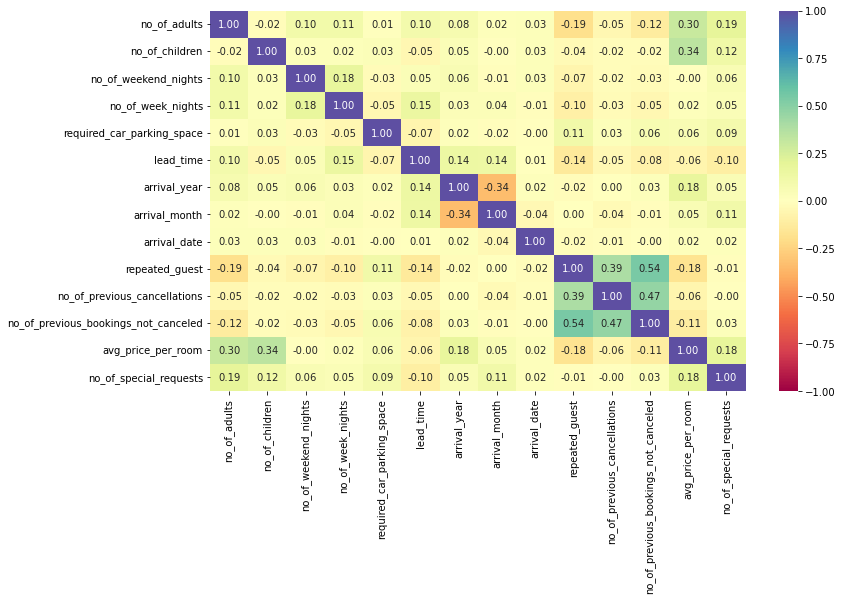

<IPython.core.display.Javascript object>

In [325]:
cols_list = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- The variables are not much correlated and they are all independent.
- The maximum correlation is for no_of_previous_bookings_not_cancelled and repeated_guest

In [326]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [327]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**1. What are the busiest months in the hotel?**

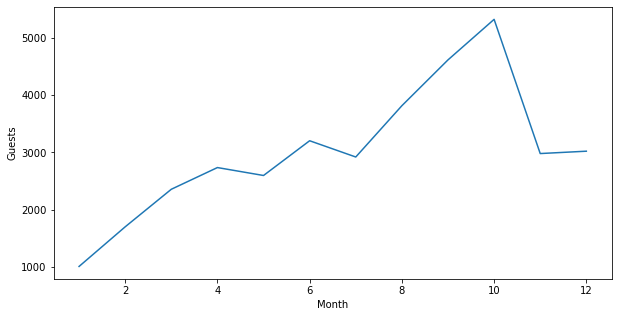

<IPython.core.display.Javascript object>

In [328]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = hotel.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

In [329]:
month_wise_booking_count = (
    (
        hotel[(hotel["booking_status"] != "Canceled")]
        .groupby(["arrival_year", "arrival_month"])
        .agg(no_of_booking=("Booking_ID", "count"))
    )
    .sort_values(["no_of_booking"], ascending=False)
    .reset_index()
)
month_wise_booking_count

arrival_year  arrival_month  no_of_booking
0           2018             10           3404
1           2018              6           3203
2           2018              9           2962
3           2018              8           2799
4           2018              4           2736
5           2018              5           2598
6           2018              7           2557
7           2018              3           2358
8           2018             11           2333
9           2018             12           2093
10          2017             10           1913
11          2018              2           1704
12          2017              9           1649
13          2017              8           1014
14          2018              1           1014
15          2017             12            928
16          2017             11            647
17          2017              7            363

<IPython.core.display.Javascript object>

#### Observations:
- Top 2 busiest months are October and June
- Bottom 2 months with less bookings are July and November

**2. Which market segment do most of the guests come from?**

booking_status           1      0    All
market_segment_type                     
All                  11885  24390  36275
Online                8475  14739  23214
Offline               3153   7375  10528
Corporate              220   1797   2017
Aviation                37     88    125
Complementary            0    391    391
------------------------------------------------------------------------------------------------------------------------


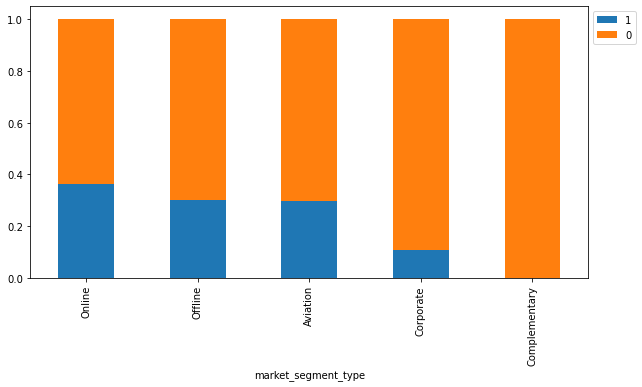

<IPython.core.display.Javascript object>

In [330]:
stacked_barplot(hotel, "market_segment_type", "booking_status")

In [331]:
market_segement_booking_count = (
    hotel.groupby(["market_segment_type"])
    .agg(no_of_bookings=("Booking_ID", "count"))
    .reset_index()
)
market_segement_booking_count

market_segment_type  no_of_bookings
0            Aviation             125
1       Complementary             391
2           Corporate            2017
3             Offline           10528
4              Online           23214

<IPython.core.display.Javascript object>

#### Observations:

- Online market segment has more no of booking compared to other types
- Aviation has the least number of bookings
- Complementary bookings has more cancellations

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

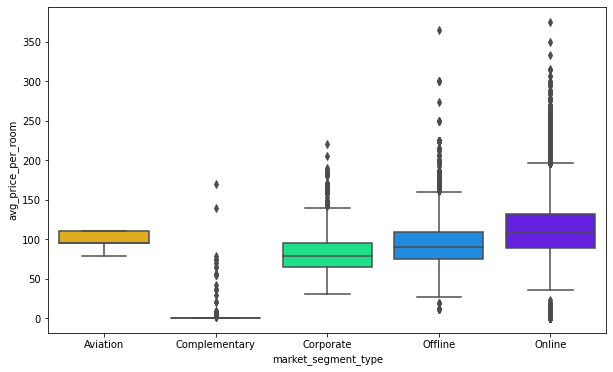

<IPython.core.display.Javascript object>

In [332]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hotel, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

In [333]:
market_segement_price_range = (
    hotel.groupby(["market_segment_type"])
    .agg(
        minimum_price=("avg_price_per_room", "min"),
        maximum_price=("avg_price_per_room", "max"),
    )
    .reset_index()
)
market_segement_price_range

market_segment_type  minimum_price  maximum_price
0            Aviation       79.00000      110.00000
1       Complementary        0.00000      170.00000
2           Corporate       31.00000      220.00000
3             Offline       12.00000      365.00000
4              Online        0.00000      375.50000

<IPython.core.display.Javascript object>

#### Observations

- The different price range for different market segments are:
1. Aviation	79.00000 to 110.00000 EUR
2. Complementary   0.00000 to 170.00000 EUR
3. Corporate	31.00000 to 220.00000 EUR
4. Offline	12.00000 to 540.00000 EUR
5. Online	0.00000 to 375.50000 EUR
6. Complementary and corporate market_segments have better price rates compared to other segments


**4. What percentage of bookings are canceled?**

In [334]:
cancelled_booking_count = hotel[hotel["booking_status"] == "Canceled"][
    "Booking_ID"
].count()
total_booking_count = hotel["Booking_ID"].count()
cancel_percentage = (cancelled_booking_count * 100) / total_booking_count
cancel_percentage

0.0

<IPython.core.display.Javascript object>

32.76% of bookings have been cancelled.

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [335]:
repeated_guest_count = hotel[hotel["repeated_guest"] == 1]["Booking_ID"].count()
repeated_guest_cancel_count = hotel[
    (hotel["repeated_guest"] == 1) & (hotel["booking_status"] == "Canceled")
]["Booking_ID"].count()

percentage_cancellation = (repeated_guest_cancel_count * 100) / repeated_guest_count
percentage_cancellation

0.0

<IPython.core.display.Javascript object>

1.72% repeated cutomers cancel their bookings

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status              1      0    All
no_of_special_requests                     
All                     11885  24390  36275
0                        8545  11232  19777
1                        2703   8670  11373
2                         637   3727   4364
3                           0    675    675
4                           0     78     78
5                           0      8      8
------------------------------------------------------------------------------------------------------------------------


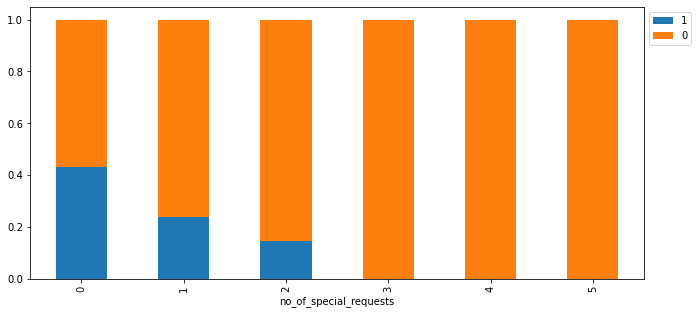

<IPython.core.display.Javascript object>

In [336]:
stacked_barplot(hotel, "no_of_special_requests", "booking_status")

In [337]:
special_requirement_booking_count = hotel[hotel["no_of_special_requests"] > 0][
    "Booking_ID"
].count()
special_requirement_cancel_count = hotel[
    (hotel["no_of_special_requests"] > 0) & (hotel["booking_status"] == "Canceled")
]["Booking_ID"].count()
per_special_req_canc_count = (
    special_requirement_cancel_count * 100
) / special_requirement_booking_count
print("per_special_req_canc_count", per_special_req_canc_count)

total_cancellation_count = hotel[hotel["booking_status"] == "Canceled"][
    "Booking_ID"
].count()
special_req_cancellation_per = (
    special_requirement_cancel_count * 100
) / total_cancellation_count

print("special_req_cancellation_per", special_req_cancellation_per)

per_special_req_canc_count 0.0
special_req_cancellation_per nan


<IPython.core.display.Javascript object>

- There is 20.25% cancellation on bookings having special requirements
- 28% of cancellations are on special requirement bookings

Looking at the two derived results. Special requirements can be a cause for cancellation.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

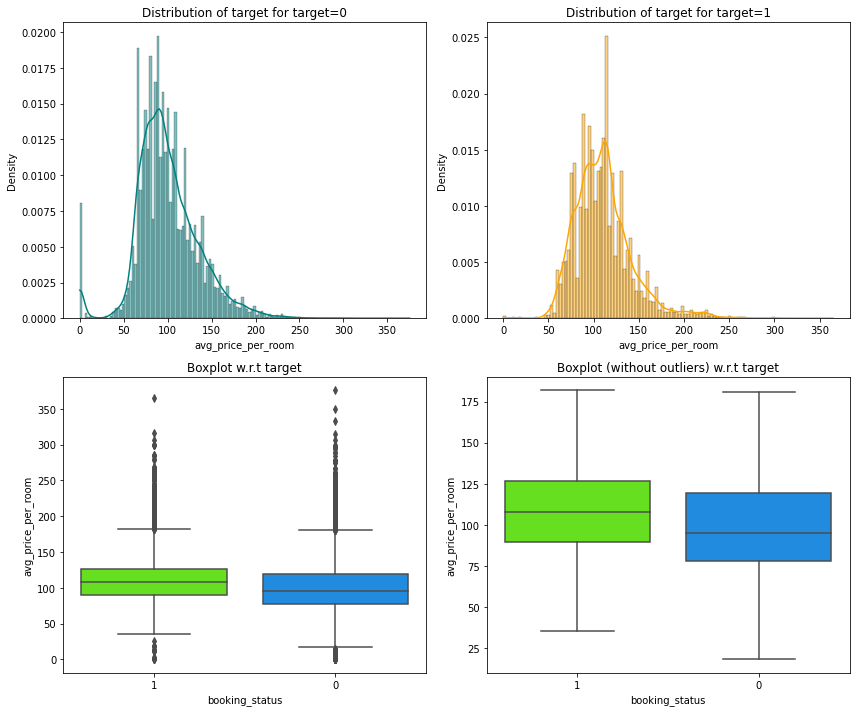

<IPython.core.display.Javascript object>

In [338]:
distribution_plot_wrt_target(hotel, "avg_price_per_room", "booking_status")

#### Observations:

- avg_price for cancelled bookings is more than not cancelled bookings

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

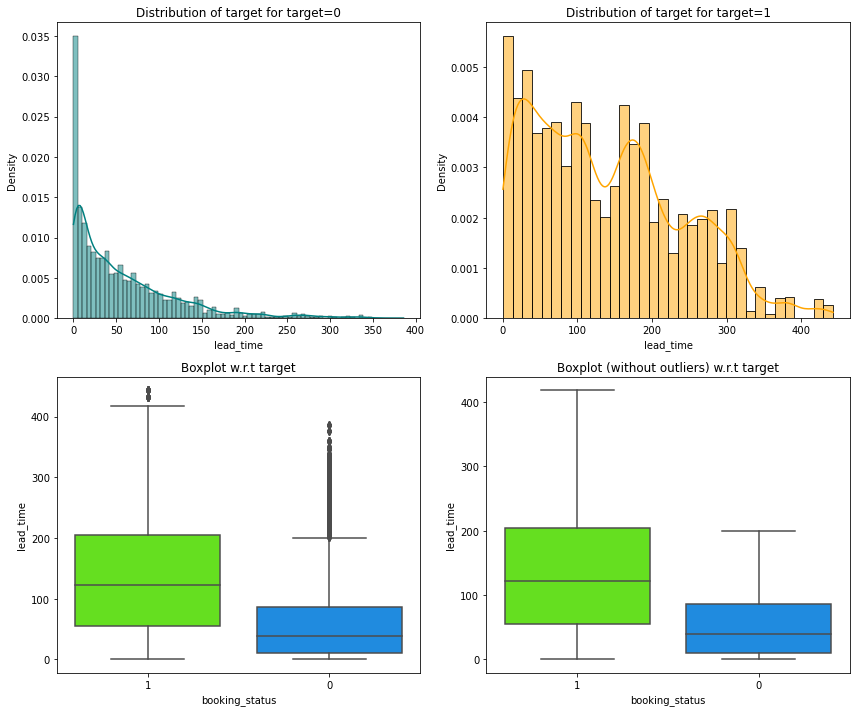

<IPython.core.display.Javascript object>

In [339]:
distribution_plot_wrt_target(hotel, "lead_time", "booking_status")

#### Observations:
- cancellations are more if the bookings are done well in advance.
- cancellations are relatively less if the bookings are done nearer to arrival date.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [340]:
family_data = hotel[(hotel["no_of_children"] >= 0) & (hotel["no_of_adults"] > 1)]
family_data.shape

(28441, 19)

<IPython.core.display.Javascript object>

In [341]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status           1      0    All
no_of_family_members                    
All                   9985  18456  28441
2                     8213  15506  23719
3                     1368   2425   3793
4                      398    514    912
5                        5     10     15
11                       1      0      1
12                       0      1      1
------------------------------------------------------------------------------------------------------------------------


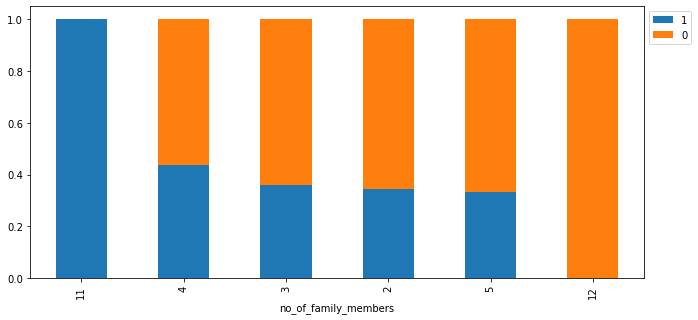

<IPython.core.display.Javascript object>

In [342]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

#### Observations:

1. cancellations are less if the booking is for family of 2 or more.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [343]:
hotel["no_of_adults"].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

<IPython.core.display.Javascript object>

In [344]:
hotel["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

In [345]:
hotel["no_of_weekend_nights"].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

<IPython.core.display.Javascript object>

In [346]:
hotel["no_of_week_nights"].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

<IPython.core.display.Javascript object>

In [347]:
hotel["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

In [348]:
hotel["required_car_parking_space"].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

<IPython.core.display.Javascript object>

In [349]:
hotel["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

<IPython.core.display.Javascript object>

In [350]:
hotel["arrival_year"].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

<IPython.core.display.Javascript object>

In [351]:
hotel["arrival_month"].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

In [352]:
hotel["arrival_date"].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

<IPython.core.display.Javascript object>

In [353]:
hotel["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [354]:
hotel["repeated_guest"].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

<IPython.core.display.Javascript object>

In [355]:
hotel["no_of_previous_cancellations"].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

<IPython.core.display.Javascript object>

In [356]:
hotel["no_of_special_requests"].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

<IPython.core.display.Javascript object>

In [357]:
hotel["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

There are no missing data.

### Outlier Check

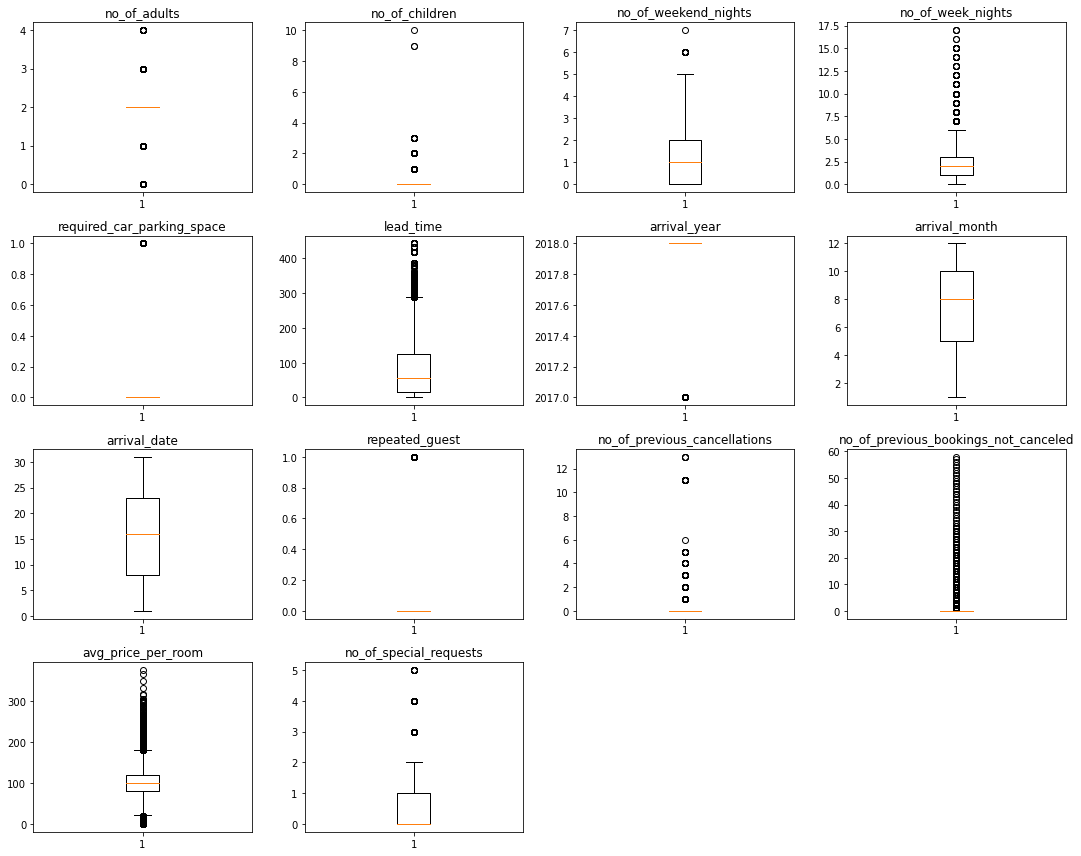

<IPython.core.display.Javascript object>

In [358]:
# outlier detection using boxplot
numeric_columns = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(hotel[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are no outstanding outliers which requires to be treated.

### Checking for duplicate values

In [359]:
hotel.duplicated().sum()

0

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

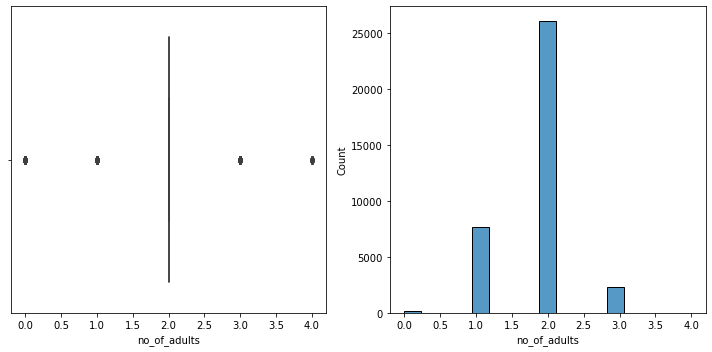

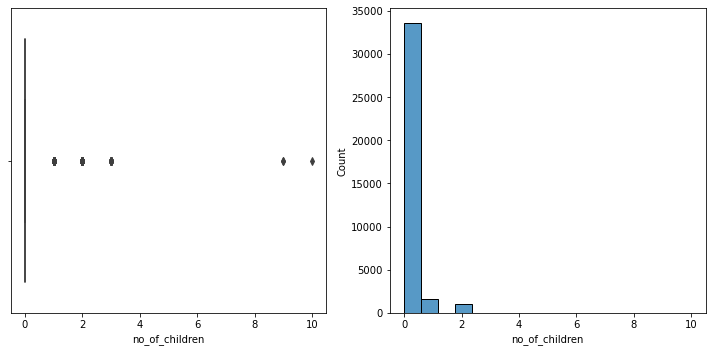

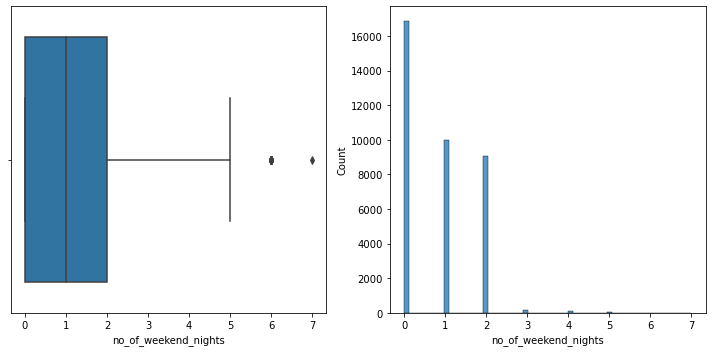

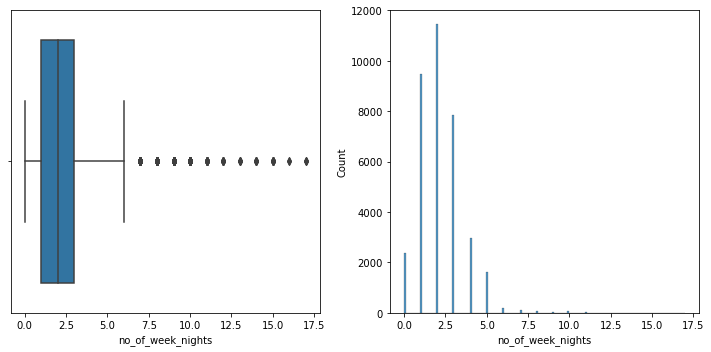

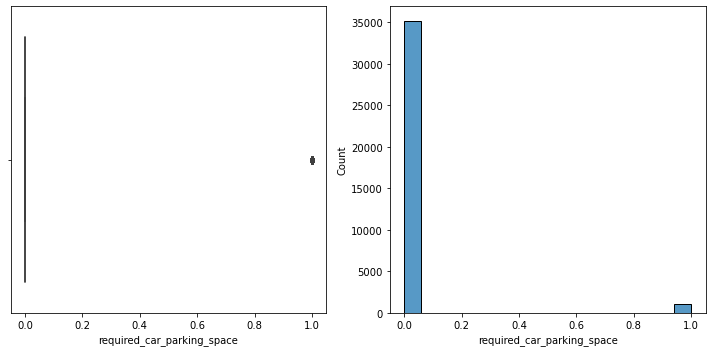

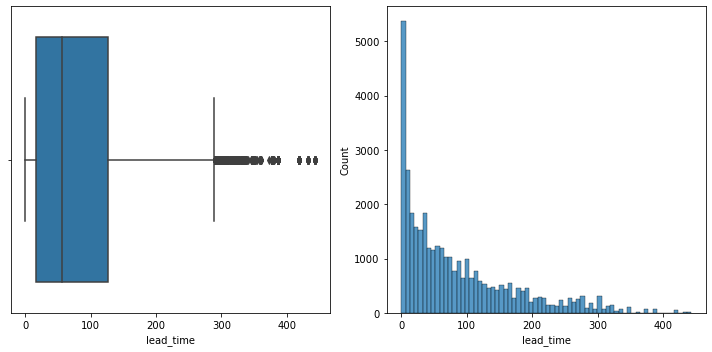

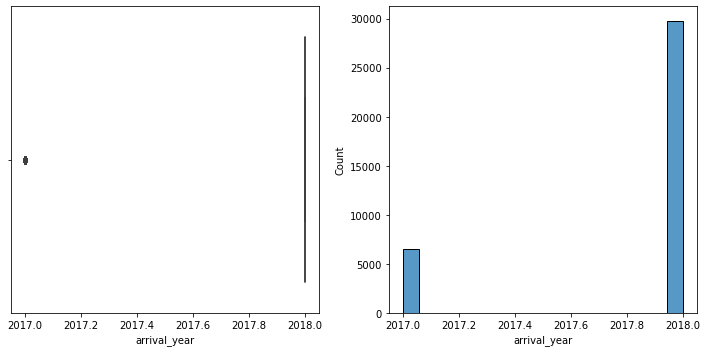

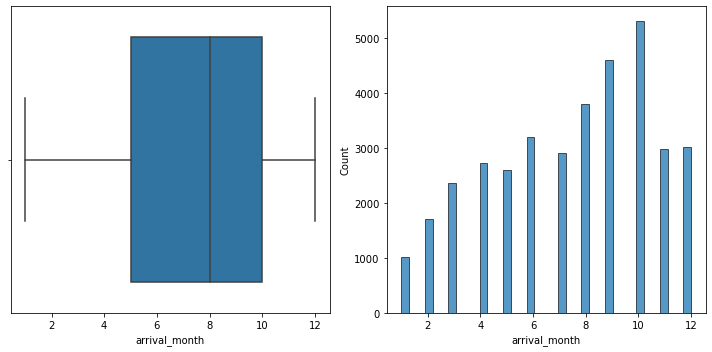

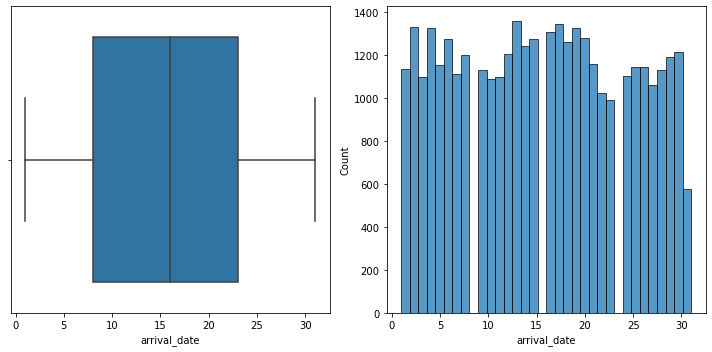

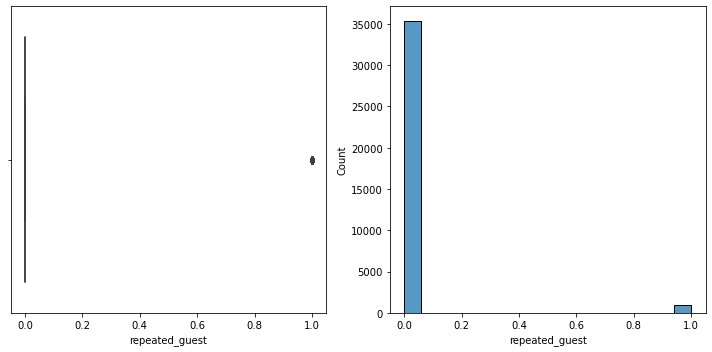

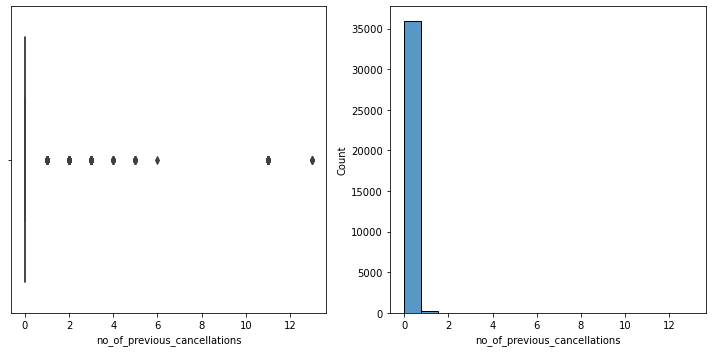

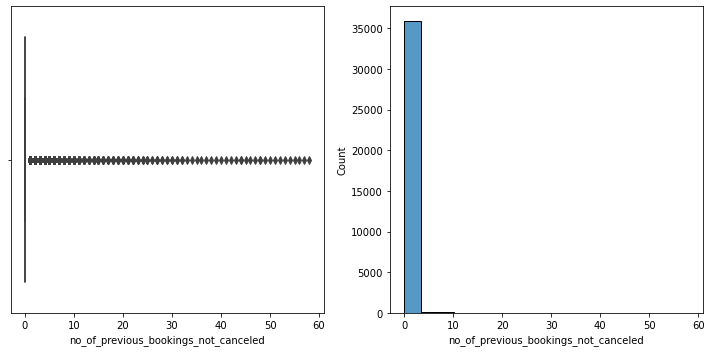

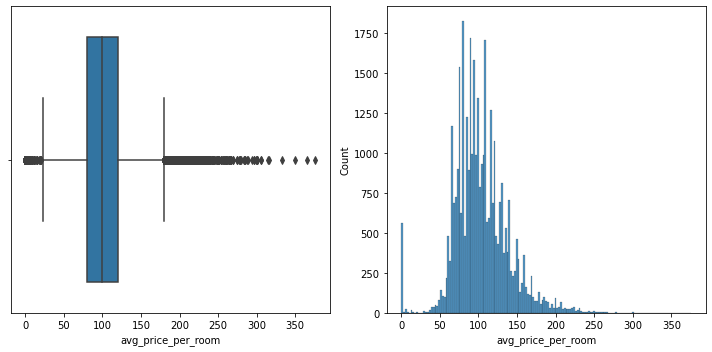

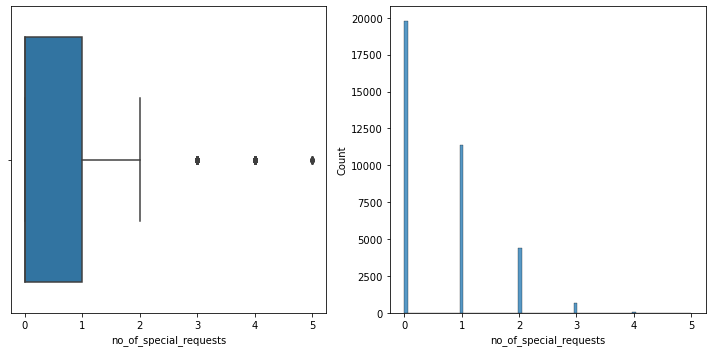

<IPython.core.display.Javascript object>

In [360]:
list_non_category_cols = hotel.columns[hotel.dtypes != "category"].tolist()
for i in list_non_category_cols:
    create_histogram_boxplot(hotel, i)

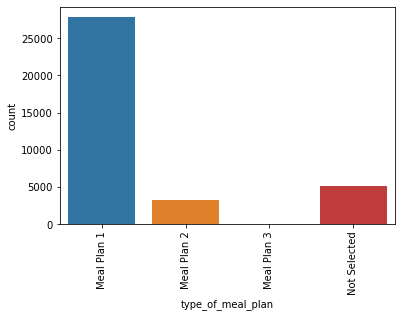

<Figure size 2160x360 with 0 Axes>

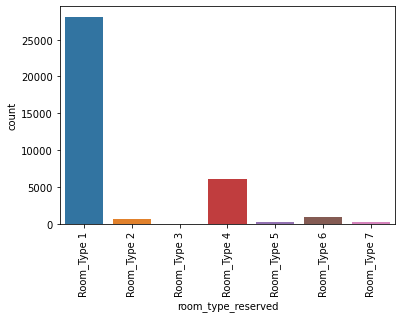

<Figure size 2160x360 with 0 Axes>

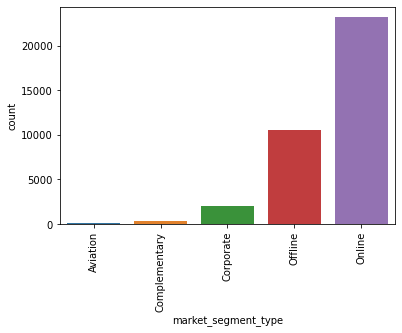

<Figure size 2160x360 with 0 Axes>

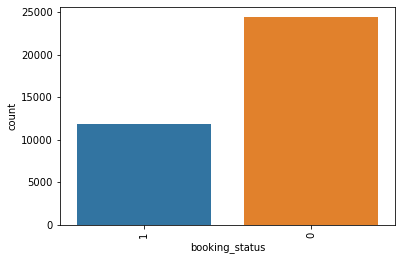

<Figure size 2160x360 with 0 Axes>

<IPython.core.display.Javascript object>

In [361]:
for i in list_category_cols:
    create_count_boxplot(hotel, i, (30, 5))

### Data Preparation for modeling

In [362]:
X = hotel.drop(["booking_status", "Booking_ID"], axis=1)
Y = hotel["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [363]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicted a non-defaulter as a defaulter - False Positive
2. Model predicted a defaulter as a non-defaulter - False Negative

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [364]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [365]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression (with statsmodels library)

In [366]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.3274
Time:                        17:17:51   Log-Likelihood:                -10823.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.1010      0.038      2.688      0.007       0.027       0.175
no_of_children                           0.1627      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of booking cancellation decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of booking cancellation increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.

2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?** 

* Both the cases are important as:

  * If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

  * If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [367]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [368]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

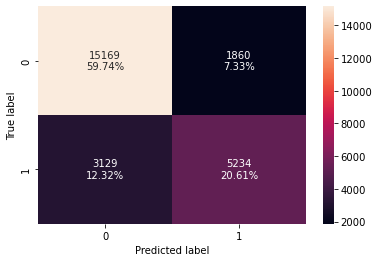

<IPython.core.display.Javascript object>

In [369]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [370]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80352 0.62585    0.73781 0.67723

<IPython.core.display.Javascript object>

**Observations**

- Accuracy = 0.80352, Recall = 0.62585, Precision = 0.73781, F1 = 0.67723

- The recall score of the model is 0.62585 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [371]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            18.33165
no_of_children                           2.11103
no_of_weekend_nights                     2.00373
no_of_week_nights                        3.77629
required_car_parking_space               1.07375
lead_time                                2.47420
arrival_year                           329.55683
arrival_month                            7.20765
arrival_date                             4.21962
repeated_guest                           1.82799
no_of_previous_cancellations             1.40040
no_of_previous_bookings_not_canceled     1.65987
avg_price_per_room                      18.80602
no_of_special_requests                   2.01699
type_of_meal_plan_Meal Plan 2            1.32671
type_of_meal_plan_Meal Plan 3            1.02542
type_of_meal_plan_Not Selected           1.43811
room_type_reserved_Room_Type 2           1.12255
room_type_reserved_Room_Type 3           1.00347
room_type_reserved_Room_Type 4    

<IPython.core.display.Javascript object>

* 'no_of_adults', 'arrival_year', 'avg_price_per_room', 'market_segment_type_Corporate', 'market_segment_type_Corporate' and 'market_segment_type_Online' exhibit high multicollinearity

**Removing 'no_of_adults'**

In [372]:
X_train1 = X_train.drop("no_of_adults", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_children                           2.07628
no_of_weekend_nights                     1.99432
no_of_week_nights                        3.77292
required_car_parking_space               1.07326
lead_time                                2.44544
arrival_year                           328.31099
arrival_month                            7.20425
arrival_date                             4.21845
repeated_guest                           1.82546
no_of_previous_cancellations             1.39978
no_of_previous_bookings_not_canceled     1.65909
avg_price_per_room                      18.23894
no_of_special_requests                   1.99490
type_of_meal_plan_Meal Plan 2            1.32662
type_of_meal_plan_Meal Plan 3            1.02539
type_of_meal_plan_Not Selected           1.43341
room_type_reserved_Room_Type 2           1.12035
room_type_reserved_Room_Type 3           1.00344
room_type_reserved_Room_Type 4           1.55517
room_type_reserved_Room_Type 5    

<IPython.core.display.Javascript object>

In [373]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80435 0.62968    0.73785 0.67948

<IPython.core.display.Javascript object>

**Observations**

- Accuracy = 0.80435, Recall = 0.62585, Precision = 0.73785, F1 = 0.67723

- Its almost same as the previous value so we can remove the column no_of_adults

**Removing 'arrival_year'**

In [374]:
X_train1 = X_train.drop(["no_of_adults", "arrival_year"], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_children                          2.07563
no_of_weekend_nights                    1.98426
no_of_week_nights                       3.72973
required_car_parking_space              1.07315
lead_time                               2.44529
arrival_month                           7.10349
arrival_date                            4.17406
repeated_guest                          1.81753
no_of_previous_cancellations            1.39976
no_of_previous_bookings_not_canceled    1.65885
avg_price_per_room                     17.55143
no_of_special_requests                  1.99148
type_of_meal_plan_Meal Plan 2           1.32498
type_of_meal_plan_Meal Plan 3           1.02538
type_of_meal_plan_Not Selected          1.42950
room_type_reserved_Room_Type 2          1.11966
room_type_reserved_Room_Type 3          1.00343
room_type_reserved_Room_Type 4          1.55487
room_type_reserved_Room_Type 5          1.03458
room_type_reserved_Room_Type 6          2.00709
room_

<IPython.core.display.Javascript object>

In [375]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80155 0.62633    0.73238 0.67522

<IPython.core.display.Javascript object>

**Observations**

- Accuracy = 0.80155, Recall = 0.62633, Precision = 0.73238, F1 = 0.67522

- Its almost same as the previous value so we can remove the column arrival_year too

**Remove 'avg_price_per_room'**

In [376]:
X_train1 = X_train.drop(["no_of_adults", "arrival_year", "avg_price_per_room"], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_children                          2.04928
no_of_weekend_nights                    1.97752
no_of_week_nights                       3.72426
required_car_parking_space              1.06890
lead_time                               2.42762
arrival_month                           7.02795
arrival_date                            4.17152
repeated_guest                          1.81148
no_of_previous_cancellations            1.39970
no_of_previous_bookings_not_canceled    1.65857
no_of_special_requests                  1.98570
type_of_meal_plan_Meal Plan 2           1.25851
type_of_meal_plan_Meal Plan 3           1.02529
type_of_meal_plan_Not Selected          1.41049
room_type_reserved_Room_Type 2          1.11162
room_type_reserved_Room_Type 3          1.00340
room_type_reserved_Room_Type 4          1.40473
room_type_reserved_Room_Type 5          1.02134
room_type_reserved_Room_Type 6          1.85825
room_type_reserved_Room_Type 7          1.07484
marke

<IPython.core.display.Javascript object>

In [377]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.78793 0.57539    0.72404 0.64122

<IPython.core.display.Javascript object>

**Observations**

- Accuracy = 0.787935, Recall = 0.57539, Precision = 0.72404, F1 = 0.64122

- Accuracy is reducing from 0.80 to 0.78 so lets try not to remove the column arrival_year and try market_segment_type_Online

**Remove 'avg_price_per_room'**

In [378]:
X_train1 = X_train.drop(["no_of_adults", "arrival_year", "avg_price_per_room"], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_children                          2.04928
no_of_weekend_nights                    1.97752
no_of_week_nights                       3.72426
required_car_parking_space              1.06890
lead_time                               2.42762
arrival_month                           7.02795
arrival_date                            4.17152
repeated_guest                          1.81148
no_of_previous_cancellations            1.39970
no_of_previous_bookings_not_canceled    1.65857
no_of_special_requests                  1.98570
type_of_meal_plan_Meal Plan 2           1.25851
type_of_meal_plan_Meal Plan 3           1.02529
type_of_meal_plan_Not Selected          1.41049
room_type_reserved_Room_Type 2          1.11162
room_type_reserved_Room_Type 3          1.00340
room_type_reserved_Room_Type 4          1.40473
room_type_reserved_Room_Type 5          1.02134
room_type_reserved_Room_Type 6          1.85825
room_type_reserved_Room_Type 7          1.07484
marke

<IPython.core.display.Javascript object>

In [379]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.78793 0.57539    0.72404 0.64122

<IPython.core.display.Javascript object>

**Observations**

- Accuracy = 0.78793, Recall = 0.57539, Precision = 0.72404, F1 = 0.64122
- Its same as before removing columns so we can remove all the 3 columns "no_of_adults", "arrival_year", "avg_price_per_room"

**Let's check the summary of the model without all the four columns.**

In [380]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.2991
Time:                        17:18:04   Log-Likelihood:                -11279.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.3276      0.056      5.887      0.000       0.219       0.437
no_of_weekend_nights                     0.0549      

<IPython.core.display.Javascript object>

**Observations:**
1. Dropping 3 columns "no_of_adults", "arrival_year", "avg_price_per_room" doesn't have a significant impact on the model performance.
2. Here, we will go with the lg2 model - where we dropped education_no_of_years as the education column captures more specific information.
3. Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

### Removing high p-value variables

* We will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

**Using a loop to drop variables with high p-values**

In [381]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

In [382]:
X_train2 = X_train1[selected_features]

<IPython.core.display.Javascript object>

In [383]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Sat, 09 Jul 2022   Pseudo R-squ.:                  0.2935
Time:                        17:18:10   Log-Likelihood:                -11368.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                     0.3409      0.054      6.273      0.000       0.234       0.447
no_of_weekend_nights               0.0512      0.019      2.742      0.

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of no_of_children, no_of_weekend_nights, lead_time, no_of_previous_cancellations, type_of_meal_plan_Meal Plan 2, type_of_meal_plan_Not Selected, room_type_reserved_Room_Type 4  and room_type_reserved_Room_Type 6are positive an increase in these will lead to increase in chances of cancellation.

* Coefficient of required_car_parking_space,arrival_month,repeated_guest, no_of_special_requests,room_type_reserved_Room_Type 2, market_segment_types are negative increase in these will lead to decrease in chances of cancellation.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [384]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

no_of_children  no_of_weekend_nights  required_car_parking_space  \
Odds                1.40619               1.05249                     0.25177   
Change_odd%        40.61919               5.24945                   -74.82264   

             lead_time  arrival_month  repeated_guest  \
Odds           1.01539        0.94812         0.03450   
Change_odd%    1.53857       -5.18827       -96.54986   

             no_of_previous_cancellations  no_of_special_requests  \
Odds                              1.27478                 0.25283   
Change_odd%                      27.47823               -74.71721   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.57322                         1.12486   
Change_odd%                       57.32153                        12.48606   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.48523                         1.29614   
Change_odd%                       -51.47730                        29.61418   

             room_type_reserved_Room_Type 6  market_segment_type_Corporate  \
Odds                                1.32540                        0.17666   
Change_odd%                        32.53964                      -82.33367   

             market_segment_type_Offline  market_segment_type_Online  
Odds                             0.07512                     0.59536  
Change_odd%                    -92.48763                   -40.46367

<IPython.core.display.Javascript object>

**Coefficient interpretations**

* `no_of_children`: Holding all other features constant a 1 unit change in no_of_children will increase the odds of booking cancellation by 1.41 times or a 40.61% increase in odds of booking cancellation.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of booking cancellation by 1.05 times or a 5.25% increase in odds of booking cancellation.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in required_car_parking_space will increase the odds of booking cancellation by 0.25 times or a 74.82% decrease in odds of booking cancellation.
* `lead_time`: Holding all other features constant a 1 unit change in lead_time will increase the odds of booking cancellation by 1.01 times or a 1.53% increase in odds of booking cancellation.
* `arrival_month`: Holding all other features constant a 1 unit change in arrival_month will increase the odds of booking cancellation by 0.95 times or a 5.19% decrease in odds of booking cancellation.
* `repeated_guest`: Holding all other features constant a 1 unit change in repeated_guest will increase the odds of booking cancellation by 0.04 times or a 96.54% decrease in odds of booking cancellation.
* `no_of_previous_cancellations`: Holding all other features constant a 1 unit change in no_of_previous_cancellations will increase the odds of booking cancellation by 1.28 times or a 27.47% increase in odds of booking cancellation.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in no_of_special_requests will increase the odds of booking cancellation by 0.25 times or a 74.71% decrease in odds of booking cancellation.
* `type_of_meal_plan_Meal Plan 2	`: Holding all other features constant a 1 unit change in type_of_meal_plan_Meal Plan 2 will increase the odds of booking cancellation by 1.57 times or a 57.32% increase in odds of booking cancellation.
* `type_of_meal_plan_Not Selected`: Holding all other features constant a 1 unit change in type_of_meal_plan_Not Selected will increase the odds of booking cancellation by 1.13 times or a 12.49% increase in odds of booking cancellation.
* `room_type_reserved_Room_Type 2`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 2 will increase the odds of booking cancellation by 0.49 times or a 51.47% decrease in odds of booking cancellation.
* `room_type_reserved_Room_Type 4`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 4 will increase the odds of booking cancellation by 1.30 times or a 29.61% increase in odds of booking cancellation.
* `room_type_reserved_Room_Type 6`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 6 will increase the odds of booking cancellation by 1.33 times or a 32.54% increase in odds of booking cancellation.
* `market_segment_type_Corporate`: Holding all other features constant a 1 unit change in market_segment_type_Corporate will increase the odds of booking cancellation by 0.18 times or a 82.33% decrease in odds of booking cancellation.
* `market_segment_type_Offline`: Holding all other features constant a 1 unit change in market_segment_type_Offline will increase the odds of booking cancellation by 0.08 times or a 92.49% decrease in odds of booking cancellation.
* `market_segment_type_Online`: Holding all other features constant a 1 unit change in market_segment_type_Online will increase the odds of booking cancellation by 0.60 times or a 40.46% decrease in odds of booking cancellation.

### Checking performance of the new model

**Training set performance**

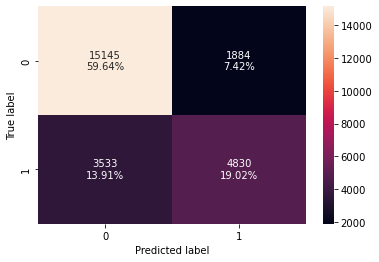

<IPython.core.display.Javascript object>

In [385]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [386]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.78667 0.57754    0.71939 0.64071

<IPython.core.display.Javascript object>

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [387]:
X_test2 = X_test[list(X_train2.columns)]

<IPython.core.display.Javascript object>

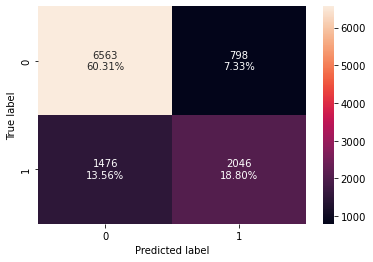

<IPython.core.display.Javascript object>

In [388]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [389]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.79105 0.58092    0.71941 0.64279

<IPython.core.display.Javascript object>

- The model is giving a recall score of 0.57754 and 0.58092 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement
* Let's see if the recall_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the rthreshold for best recall position recall as our metric of choice is recall_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

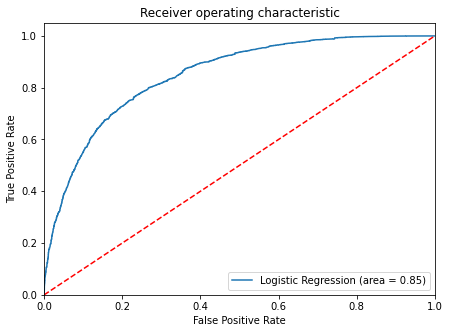

<IPython.core.display.Javascript object>

In [390]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [391]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.34485871962828474


<IPython.core.display.Javascript object>

**Checking model performance on training set**

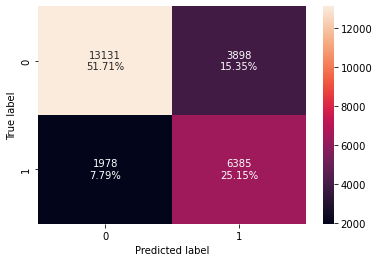

<IPython.core.display.Javascript object>

In [392]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [393]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.76859 0.76348    0.62093 0.68487

<IPython.core.display.Javascript object>

* Recall of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

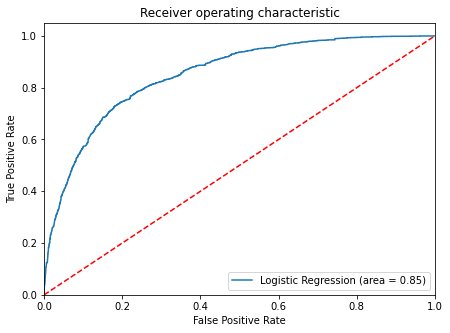

<IPython.core.display.Javascript object>

In [394]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

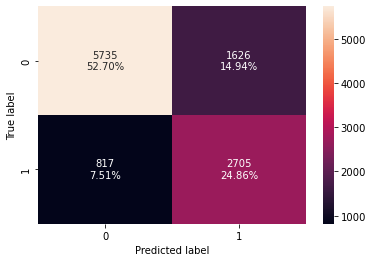

<IPython.core.display.Javascript object>

In [395]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [396]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77552 0.76803    0.62457 0.68891

<IPython.core.display.Javascript object>

### Precision-Recall Curve

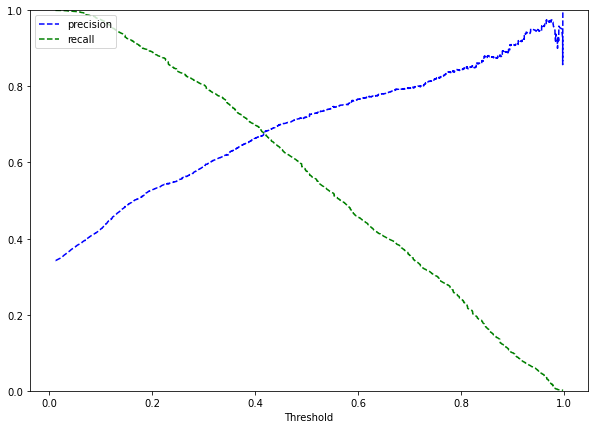

<IPython.core.display.Javascript object>

In [397]:
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [398]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

**Checking model performance on training set**

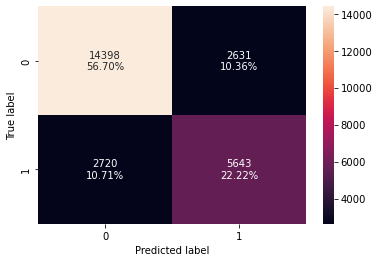

<IPython.core.display.Javascript object>

In [399]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [400]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.78926 0.67476    0.68202 0.67837

<IPython.core.display.Javascript object>

In [401]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79675 0.68484    0.68640 0.68562

<IPython.core.display.Javascript object>

## Model Performance Comparison and Final Model Selection

In [402]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.35 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.78667   
Recall                                         0.57754   
Precision                                      0.71939   
F1                                             0.64071   

           Logistic Regression-0.35 Threshold  \
Accuracy                              0.76859   
Recall                                0.76348   
Precision                             0.62093   
F1                                    0.68487   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.78926  
Recall                                0.67476  
Precision                             0.68202  
F1                                    0.67837

<IPython.core.display.Javascript object>

In [403]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.35 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.79105   
Recall                                         0.58092   
Precision                                      0.71941   
F1                                             0.64279   

           Logistic Regression-0.35 Threshold  \
Accuracy                              0.77552   
Recall                                0.76803   
Precision                             0.62457   
F1                                    0.68891   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79675  
Recall                                0.68484  
Precision                             0.68640  
F1                                    0.68562

<IPython.core.display.Javascript object>

- Almost all the three models are performing well on both training and test data without the problem of overfitting

**Which case is more important?**
- If we predict that a booking will not cancel but in reality, the booking will cancel, then the company will have to bear the cost of booking cancellation.
- If we predict that a booking will cancel but in reality, the booking does not cancel, then the company will have to bear the cost of inspection
- The validation cost is generally less compared to the booking cancellation cost

**How to reduce the losses?**
- The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

- The model with a threshold (0.35) is giving the best Recall score. Therefore it can be selected as the final model

## Final Model Summary

* We have been able to build a predictive model that can be used by the hotel to find the bookings that would be cancelled with an Recall score of 0.76 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of no_of_children, no_of_weekend_nights, lead_time, no_of_previous_cancellations, type_of_meal_plan_Meal Plan 2, type_of_meal_plan_Not Selected, room_type_reserved_Room_Type 4 and room_type_reserved_Room_Type 6are positive an increase in these will lead to increase in chances of cancellation.

* Coefficient of required_car_parking_space,arrival_month,repeated_guest, no_of_special_requests,room_type_reserved_Room_Type 2, market_segment_types are negative increase in these will lead to decrease in chances of cancellation.

## Building a Decision Tree model

In [404]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not cancel but in reality, the booking will cancel (FN)
- Predicting a booking will cancel but in reality, the booking will not cancel (FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking will cancel, then the company will have to bear the cost of booking cancellation.
- If we predict that a booking will cancel but in reality, the booking does not cancel, then the company will have to bear the cost of inspection
- The validation cost is generally less compared to the booking cancellation cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [405]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [406]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

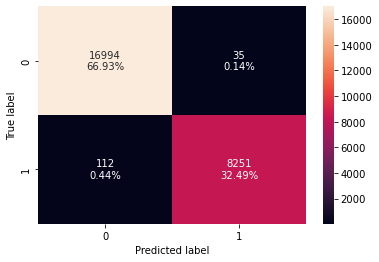

<IPython.core.display.Javascript object>

In [407]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [408]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

<IPython.core.display.Javascript object>

In [409]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

<IPython.core.display.Javascript object>

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [410]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

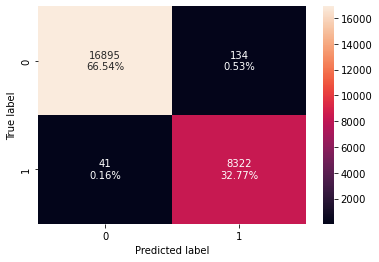

<IPython.core.display.Javascript object>

In [411]:
confusion_matrix_sklearn(model, X_train, y_train)

In [412]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

<IPython.core.display.Javascript object>

* Model is able to 99% classify all the data points on the training set.
* 0.1% errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

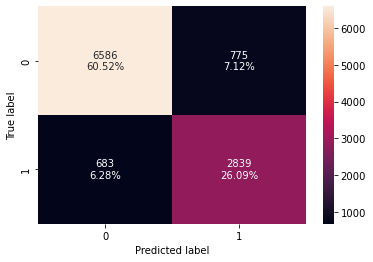

<IPython.core.display.Javascript object>

In [413]:
confusion_matrix_sklearn(model, X_test, y_test)

In [414]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86603 0.80608    0.78556 0.79568

<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [415]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

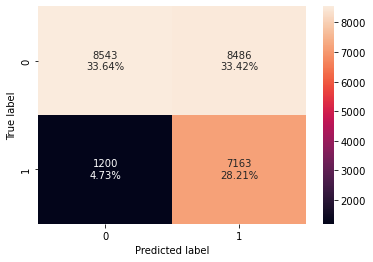

<IPython.core.display.Javascript object>

In [416]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [417]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

<IPython.core.display.Javascript object>

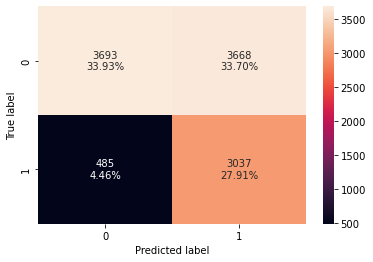

<IPython.core.display.Javascript object>

In [418]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [419]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

<IPython.core.display.Javascript object>

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

In [420]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

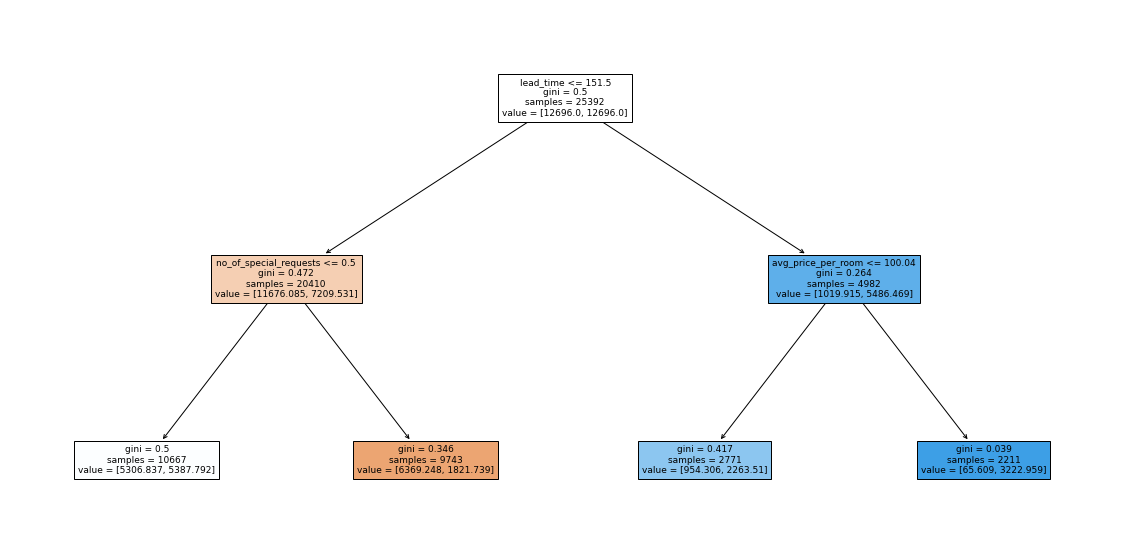

<IPython.core.display.Javascript object>

In [421]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [422]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



<IPython.core.display.Javascript object>

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead_time is less than or equal to 151.50, no_of_special_requests is less than or equal to 0.50, the booking is likely to be cancelled and If is no_of_special_requests greater than or equal to 0.50 the booking will not cancel
* If the lead_time is greater than or equal to 151.50, irrespective of avg_price_per_room the booking is likely to  cancel

In [423]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

<IPython.core.display.Javascript object>

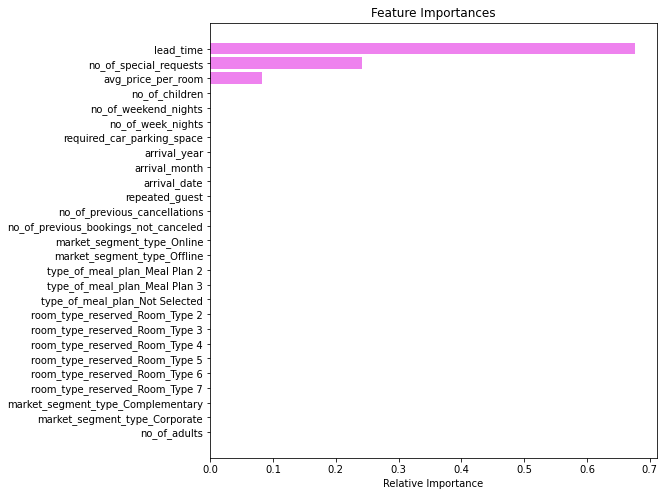

<IPython.core.display.Javascript object>

In [424]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead_time, no_of_special_requests and avg_price_per_room are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [425]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [426]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1853     0.00890     0.32806
1854     0.00980     0.33786
1855     0.01272     0.35058
1856     0.03412     0.41882
1857     0.08118     0.50000

[1858 rows x 2 columns]

<IPython.core.display.Javascript object>

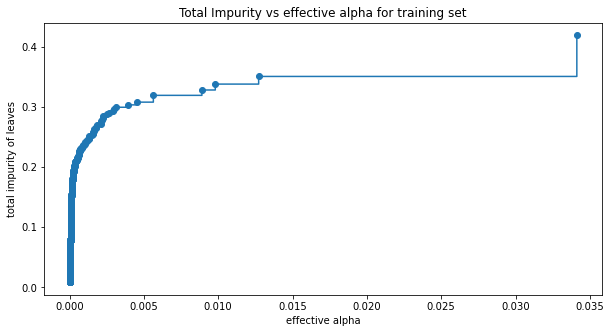

<IPython.core.display.Javascript object>

In [427]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [428]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

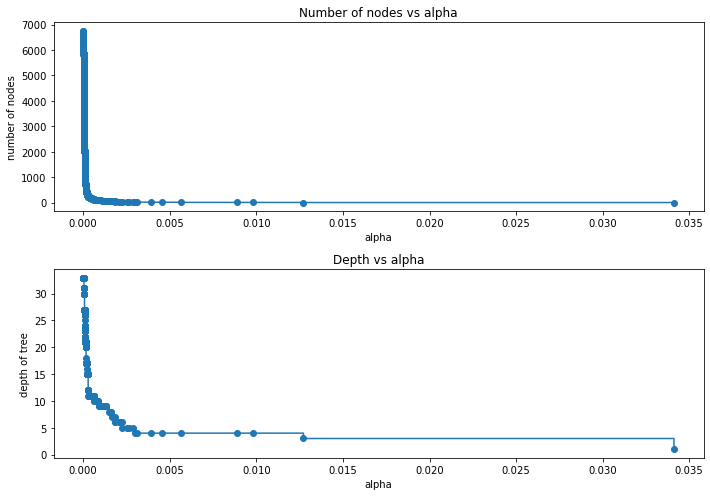

<IPython.core.display.Javascript object>

In [429]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- As alpha increases no_of_nodes and depth decreases.

In [430]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [431]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [432]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

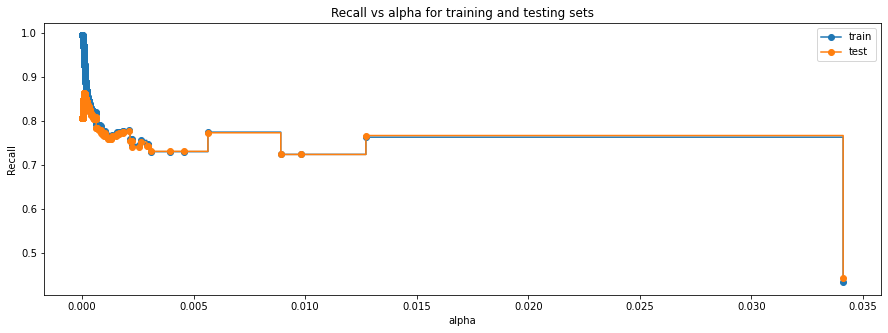

<IPython.core.display.Javascript object>

In [433]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [434]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.046650001478856e-05, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

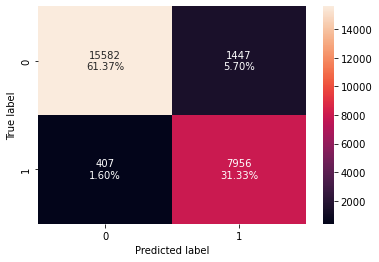

<IPython.core.display.Javascript object>

In [435]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [436]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.92698 0.95133    0.84611 0.89564

<IPython.core.display.Javascript object>

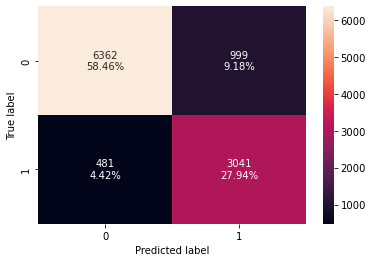

<IPython.core.display.Javascript object>

In [437]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [438]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86401 0.86343    0.75272 0.80428

<IPython.core.display.Javascript object>

####  In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.95  and 0.86 respectively which shows that the model is able to generalize well on unseen data.

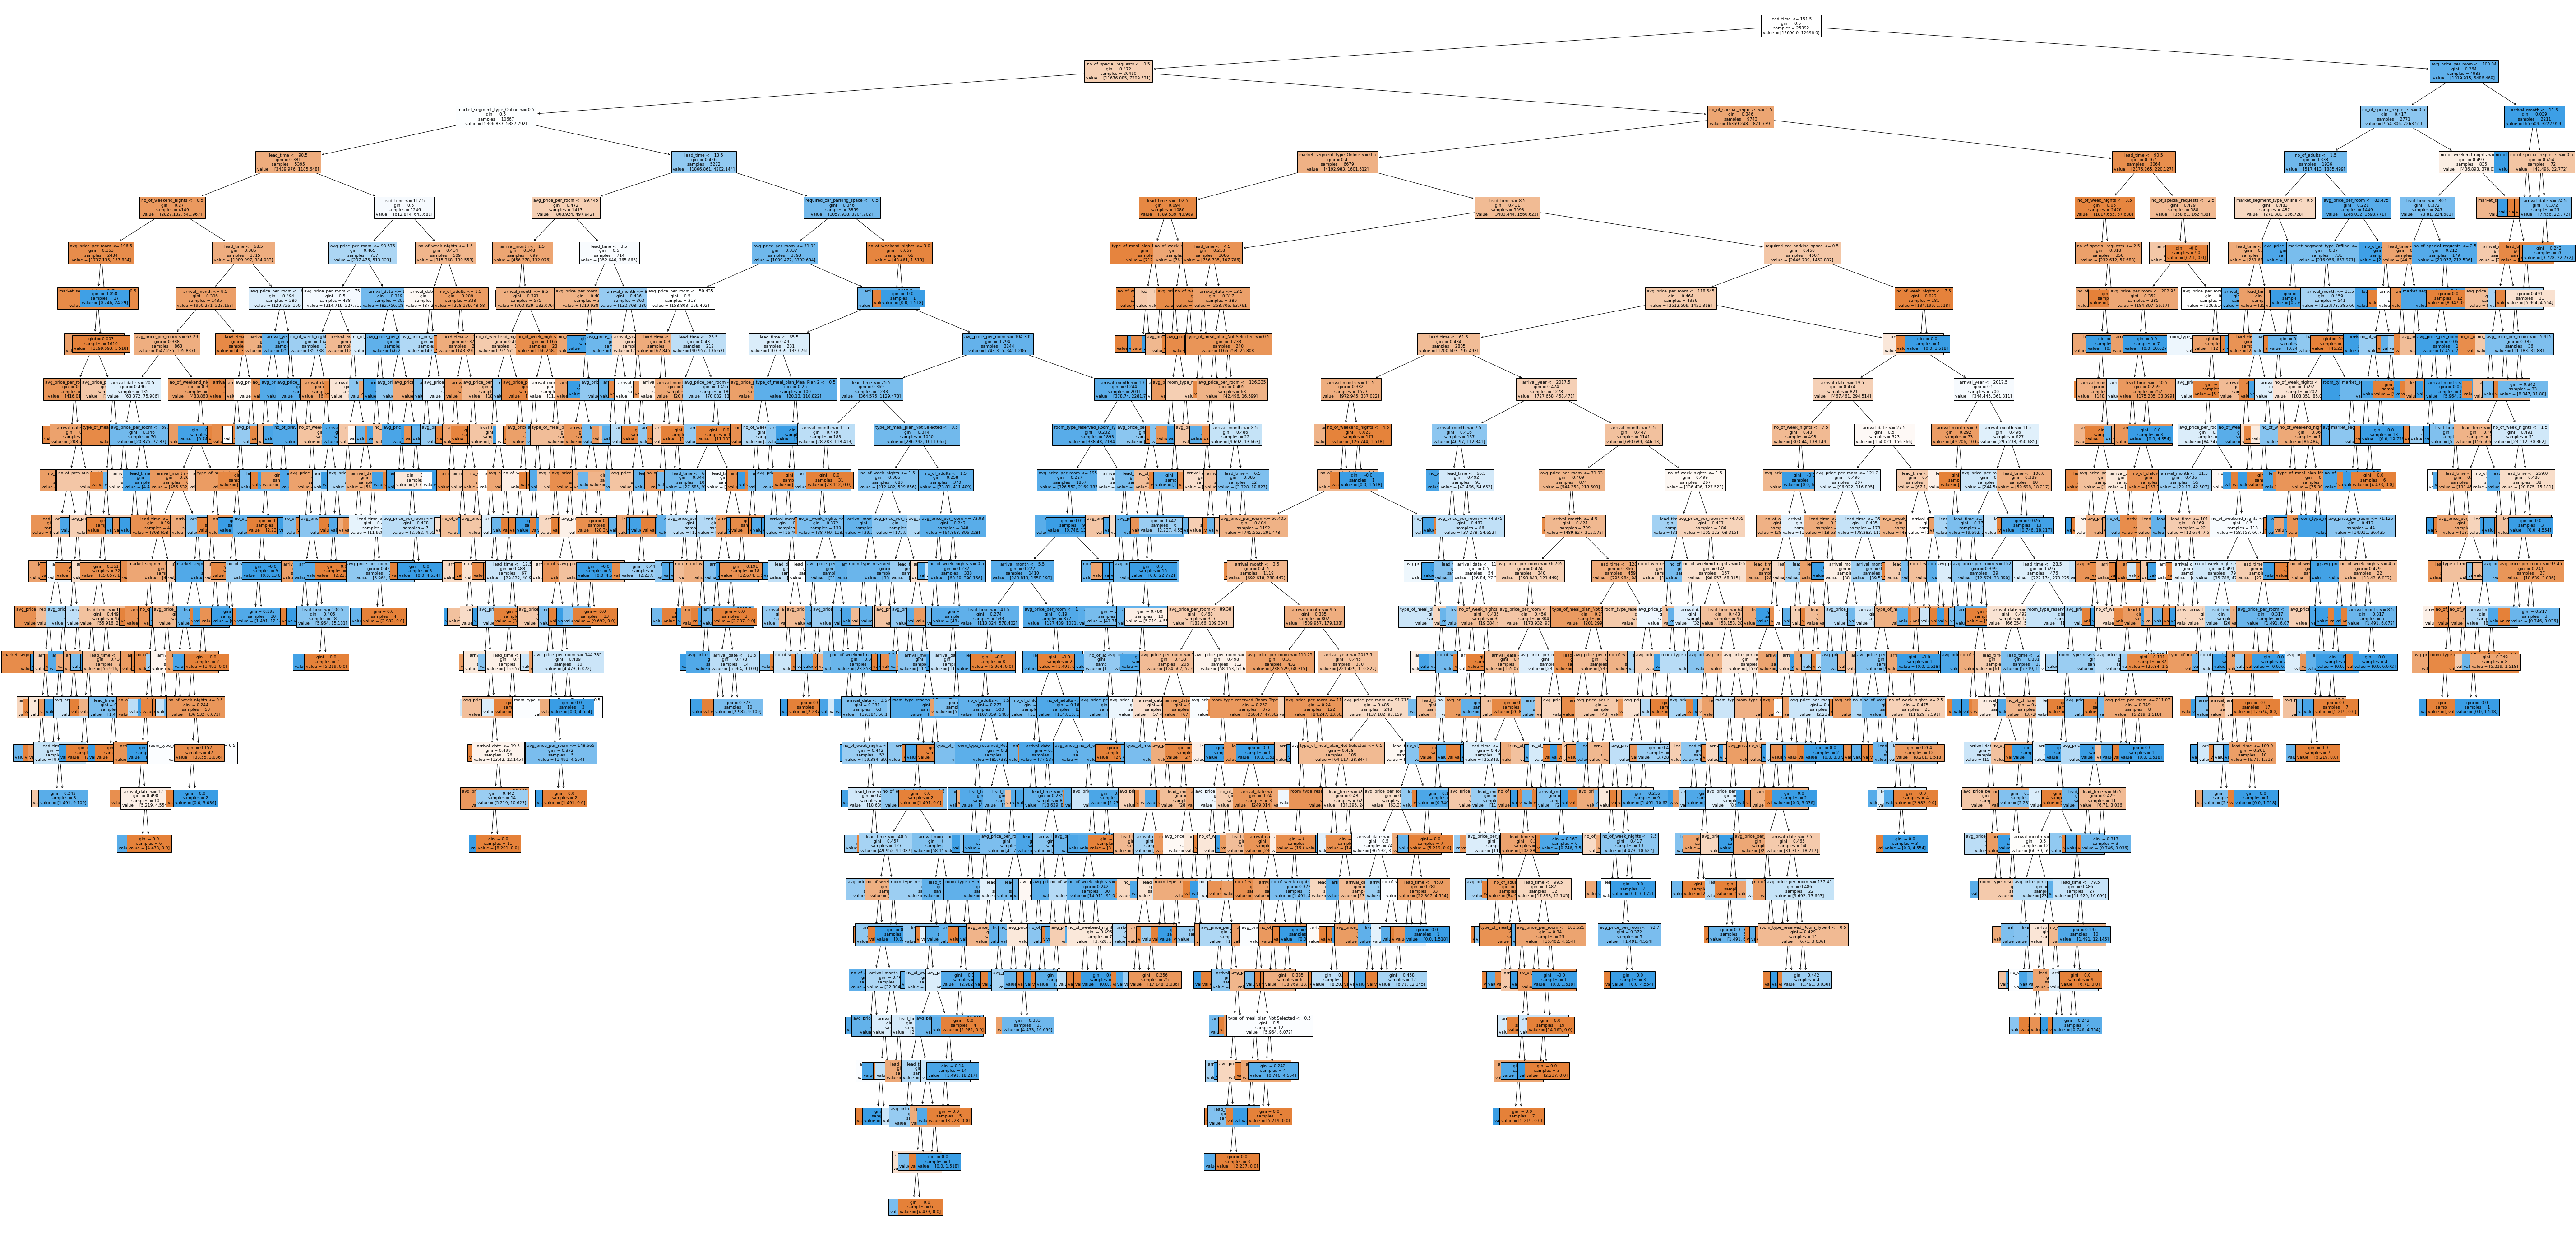

<IPython.core.display.Javascript object>

In [451]:
plt.figure(figsize=(100, 50))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [440]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [441]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

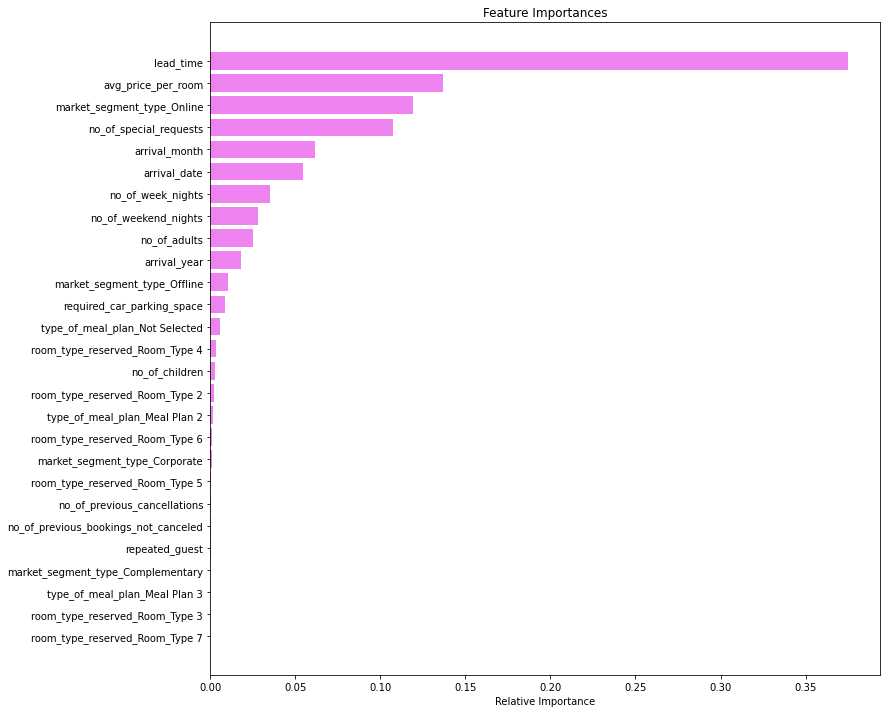

<IPython.core.display.Javascript object>

In [442]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead-time, avg_price_per_room and market_segment_type_online are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection


In [443]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92698  
Recall                          0.95133  
Precision                       0.84611  
F1                              0.89564

<IPython.core.display.Javascript object>

In [444]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87118   
Recall                                0.81175   
Precision                             0.79461   
F1                                    0.80309   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86603                      0.61840   
Recall                             0.80608                      0.86229   
Precision                          0.78556                      0.45295   
F1                                 0.79568                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86401  
Recall                          0.86343  
Precision                       0.75272  
F1                              0.80428

<IPython.core.display.Javascript object>

* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a high precision score on the train and test sets than the pre-pruned tree.

## Conclusions

- The model built can be used to predict if a booking is going to cancel or not and can correctly identify 86.3% of the booking cancellations

- lead-time, avg_price_per_room and market_segment_type_online are the most important variables in predicting if a booking will cancel or not

- From the decision tree, it has been observed that if the lead_time <= 16.50 and avg_price_per_room <= 68.50 the booking will not get cancelled
- If arrival_date >  29.50, avg_price_per_room <= 115.50 the booking is likely to cancel.
- If arrival_date >  29.50, avg_price_per_room > 115.50 the booking will not cancel.
- The company should use more data for the analysis to get more reliable results
- As the variable used vary with the type of booking (online, complementary, etc.) being performed, the company can look to build separate models for each different type of market segement

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

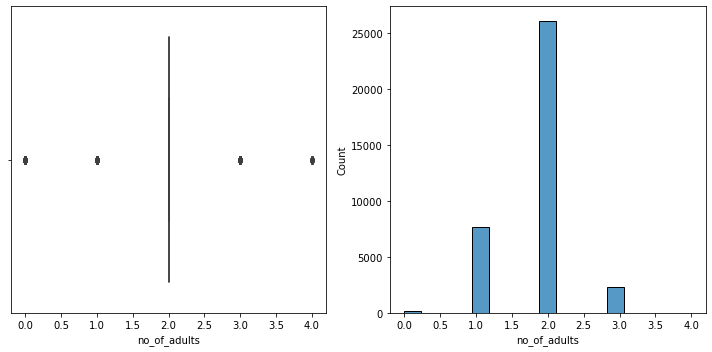

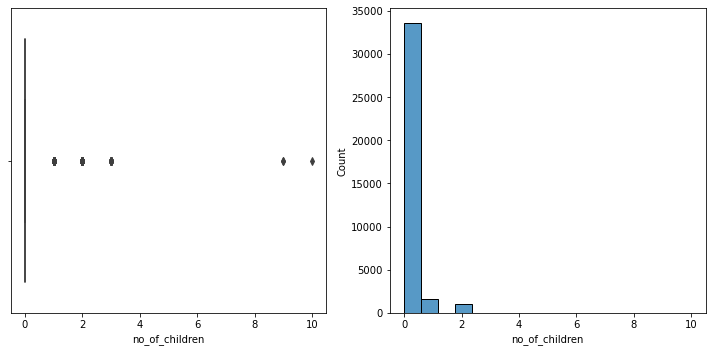

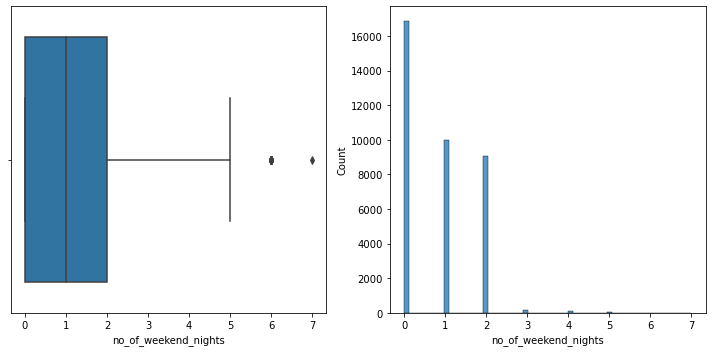

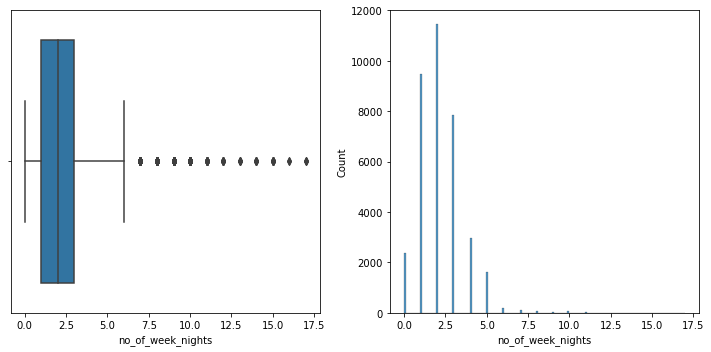

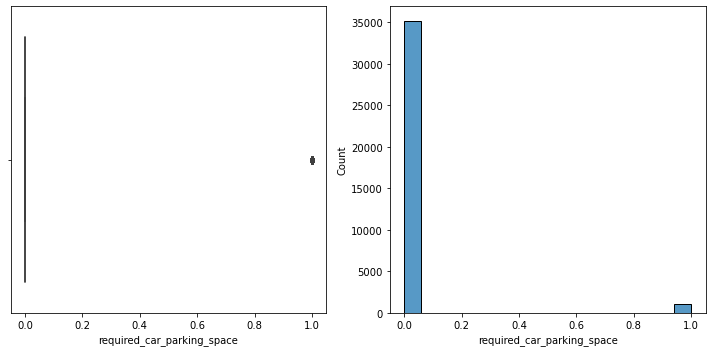

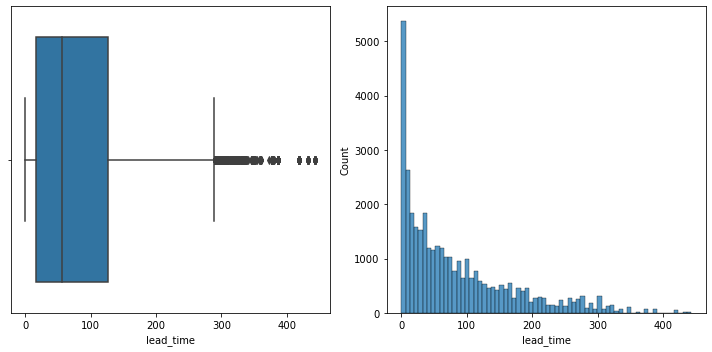

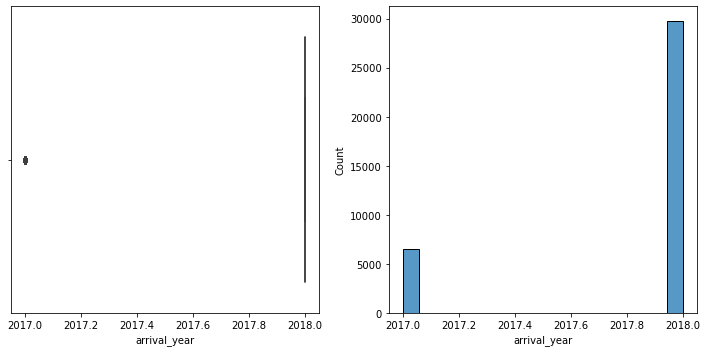

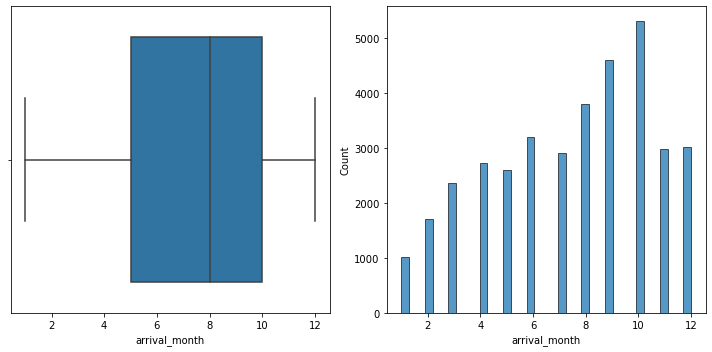

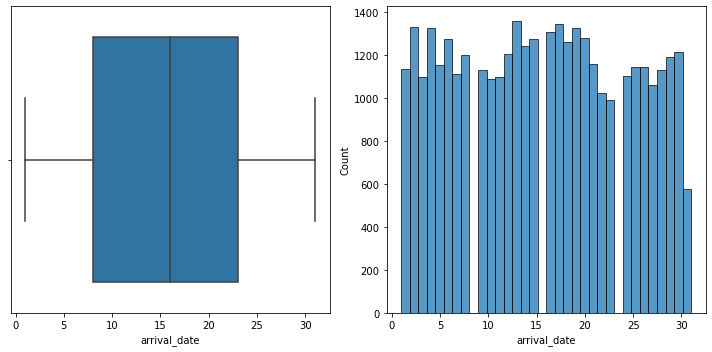

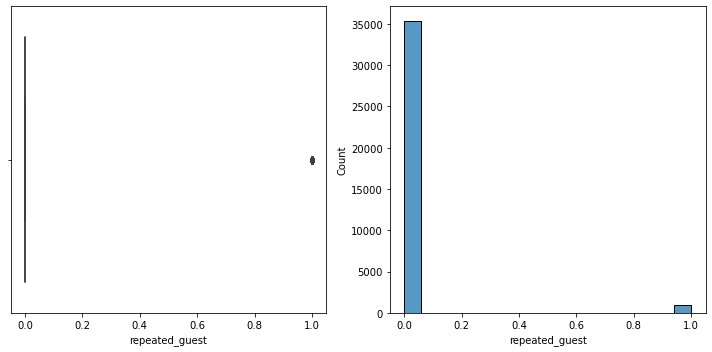

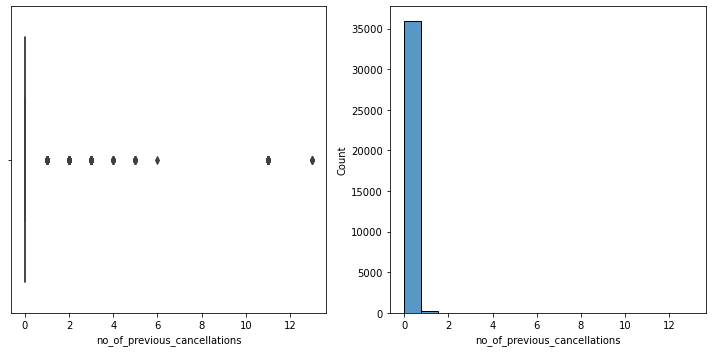

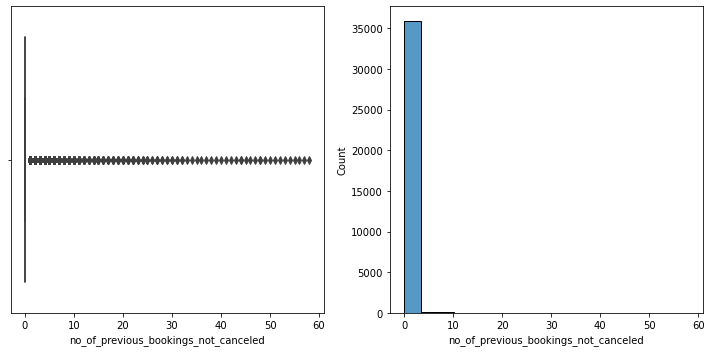

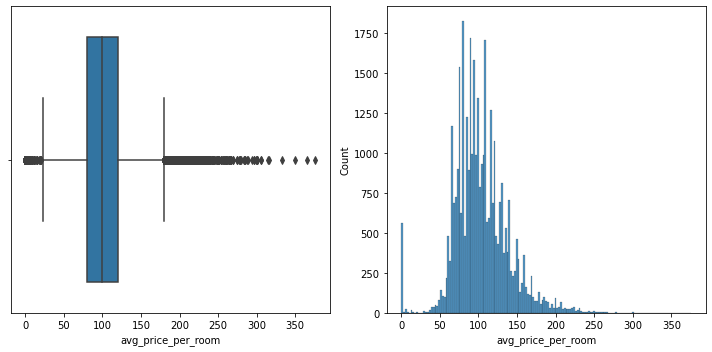

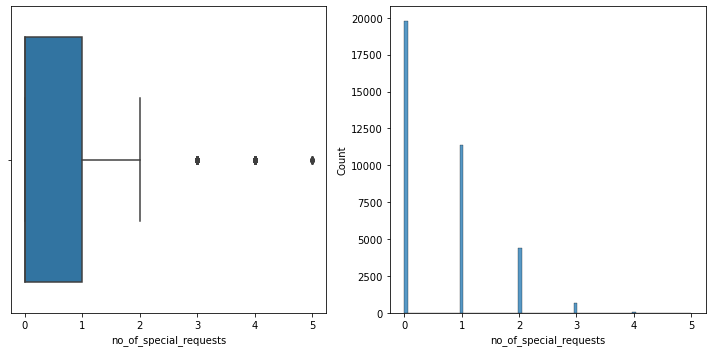

<IPython.core.display.Javascript object>

In [452]:
list_non_category_cols = hotel.columns[hotel.dtypes != "category"].tolist()
for i in list_non_category_cols:
    create_histogram_boxplot(hotel, i)

- The Observations are same as before model creations

In [453]:
list_category_cols = hotel.columns[hotel.dtypes == "category"].tolist()
list_category_cols.remove("Booking_ID")
print(list_category_cols)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


<IPython.core.display.Javascript object>

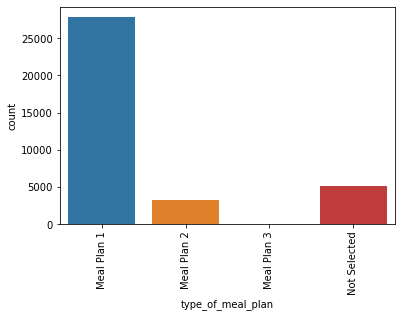

<Figure size 2160x360 with 0 Axes>

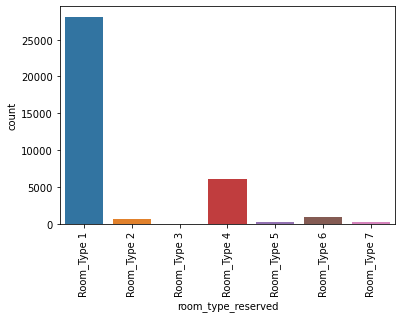

<Figure size 2160x360 with 0 Axes>

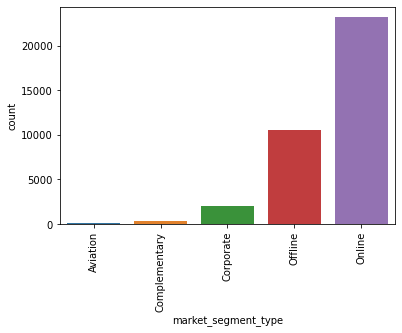

<Figure size 2160x360 with 0 Axes>

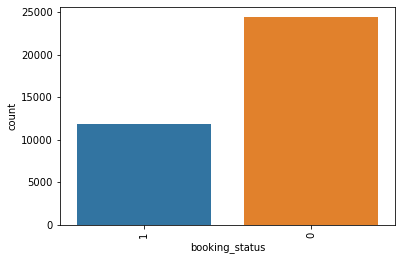

<Figure size 2160x360 with 0 Axes>

<IPython.core.display.Javascript object>

In [454]:
for i in list_category_cols:
    create_count_boxplot(hotel, i, (30, 5))

- The Observations are same as before model creations

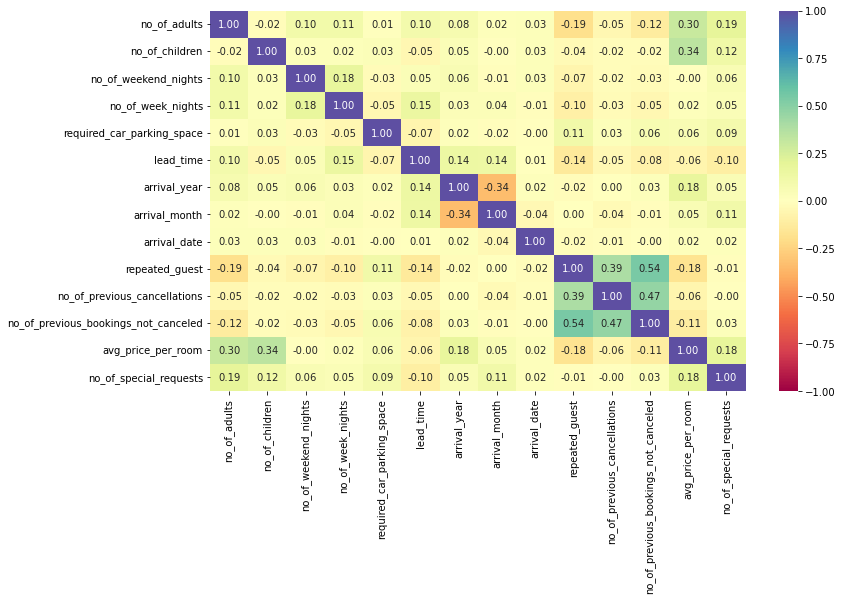

<IPython.core.display.Javascript object>

In [455]:
cols_list = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- The Observations are same as before model creations

## Model Performance Comparison and Conclusions

- Comparing both the logistic regression and decision tree model, Decision tree model gave a better inisight about the cancellation details.
- Post-Pruning Decision tree gave a good recall score with high precision score. It is good to ocnsider the post pruning decision tree with an accuracy of 0.86343 
- The most important factors that affect the bookings are 
    1. lead-time
    2. avg_price_per_room
    3. market_segment_type_online
    4. no_of_special_requests

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- The hotel can have weightlist customers to have them get their confirmation if there is any cancellation based on the cancellation list collected.
- The predications can be further nailed down upon a scale of 1 to 5 with 5 as more likely to cancel and based on such predictions we can have let customers be on wait list.
- Offers can be given to cutomers on the their next booking if they pay extra to have their booking viable to cancel and they didnt cancel eventually.
- Since online booking have more cancellations a score can be maintained for a persons booking to have a track about their booking and cancellations based on their score. Based on which it is more easy to analyse if they are more likely to cancel or not.
- Hotels can provide more discount for last minute booking based on the cancellation fee collected from the previous booking.